<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#PROJECT-PLAN" data-toc-modified-id="PROJECT-PLAN-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PROJECT PLAN</a></span><ul class="toc-item"><li><span><a href="#GOAL" data-toc-modified-id="GOAL-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>GOAL</a></span></li><li><span><a href="#SUMMARY" data-toc-modified-id="SUMMARY-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>SUMMARY</a></span></li><li><span><a href="#Data-Dictionary-for-Encoded-Attributes-used-in-Modelling" data-toc-modified-id="Data-Dictionary-for-Encoded-Attributes-used-in-Modelling-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Data Dictionary for Encoded Attributes used in Modelling</a></span></li></ul></li><li><span><a href="#DATA-ACQUISITION" data-toc-modified-id="DATA-ACQUISITION-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DATA ACQUISITION</a></span><ul class="toc-item"><li><span><a href="#DATA-SUMMARY" data-toc-modified-id="DATA-SUMMARY-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DATA SUMMARY</a></span></li></ul></li><li><span><a href="#DATA-EXPLORATION-&amp;-PREPARATION" data-toc-modified-id="DATA-EXPLORATION-&amp;-PREPARATION-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DATA EXPLORATION &amp; PREPARATION</a></span><ul class="toc-item"><li><span><a href="#More-data-exploration-using-Clustering" data-toc-modified-id="More-data-exploration-using-Clustering-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>More data exploration using Clustering</a></span></li></ul></li><li><span><a href="#Model" data-toc-modified-id="Model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model</a></span><ul class="toc-item"><li><span><a href="#Spliting-out-X-and-Y-variables-for-modeling" data-toc-modified-id="Spliting-out-X-and-Y-variables-for-modeling-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Spliting out X and Y variables for modeling</a></span><ul class="toc-item"><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Linear Regression</a></span></li><li><span><a href="#Decision-Tree-Regressor" data-toc-modified-id="Decision-Tree-Regressor-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Decision Tree Regressor</a></span></li><li><span><a href="#Random-Forest-Regressor" data-toc-modified-id="Random-Forest-Regressor-4.1.3"><span class="toc-item-num">4.1.3&nbsp;&nbsp;</span>Random Forest Regressor</a></span></li><li><span><a href="#Polynomial-Regression" data-toc-modified-id="Polynomial-Regression-4.1.4"><span class="toc-item-num">4.1.4&nbsp;&nbsp;</span>Polynomial Regression</a></span></li><li><span><a href="#Lasso-Regression" data-toc-modified-id="Lasso-Regression-4.1.5"><span class="toc-item-num">4.1.5&nbsp;&nbsp;</span>Lasso Regression</a></span></li><li><span><a href="#Ridge-Regression" data-toc-modified-id="Ridge-Regression-4.1.6"><span class="toc-item-num">4.1.6&nbsp;&nbsp;</span>Ridge Regression</a></span></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-4.1.7"><span class="toc-item-num">4.1.7&nbsp;&nbsp;</span>Elastic Net</a></span></li></ul></li></ul></li></ul></div>

**TITLE**

# PROJECT PLAN

- Use clustering to find possible features to predict our target.
- Walk through out individual work to combine ideas.
- Acquire and prepare zillow data.
- Explore data with visuals discuss/combine findings.
- Finalize how we want to handle the data.
- Try different models then decide what model we want to move forward with.

## GOAL

**Improve our original estimate of the log error by using clustering methodologies.**

**Identify the driver of logerror**

**Build a model to predict logerror**

## SUMMARY

## Data Dictionary for Encoded Attributes used in Modelling

**PACKAGES**

In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# general
import pandas as pd
import numpy as np


# explore/ stat
import scipy.stats as stats

# visuals
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D



# default pandas decimal display formatting
pd.options.display.float_format='{:20,.2f}'.format

# support modules
from env import host, user, password
import acquire

# look at function for summarize plot
import summarize
import prepare
import explore
import split_scale


# modeling
from sklearn.cluster import KMeans, dbscan
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score

# DATA ACQUISITION

Retrieve from Zillow_db:

- Latest trasaction occured within the year of 2017 for each property

- Associated logerror

- All fields related to each properties

- Gather descriptions by joining description tables

- Only properties with latitude and longitude

- Only single family homes 

> select single family residential  
>
> remove unit count = 2 and 3
>
> exluded house with no bedroom & no bathroom (doesn't count as a house)

In [2]:
# acquire data, only retreive 261 > single residential family
# df = acquire.get_zillow_data().set_index("parcelid")
df = pd.read_csv('query_result.csv').set_index("parcelid")

## DATA SUMMARY

In [3]:
summarize.df_summary(df)

--- Shape: (52169, 71)
--- Info
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52169 entries, 17052889 to 14447871
Data columns (total 71 columns):
county                          52169 non-null object
tax_rate                        52164 non-null float64
id                              52169 non-null int64
airconditioningtypeid           13605 non-null float64
airconditioningdesc             13605 non-null object
architecturalstyletypeid        70 non-null float64
architecturalstyledesc          70 non-null object
basementsqft                    47 non-null float64
bathroomcnt                     52169 non-null float64
bedroomcnt                      52169 non-null int64
buildingclasstypeid             0 non-null float64
buildingclassdesc               0 non-null float64
buildingqualitytypeid           33628 non-null float64
calculatedbathnbr               52153 non-null float64
calculatedfinishedsquarefeet    52161 non-null float64
decktypeid                      387 non-null flo

1.00    11064
Name: poolcnt, dtype: int64
poolsizesum:
(22.523, 171.6]       6
(171.6, 319.2]       46
(319.2, 466.8]      320
(466.8, 614.4]      305
(614.4, 762.0]      121
(762.0, 909.6]       48
(909.6, 1057.2]       7
(1057.2, 1204.8]      5
(1204.8, 1352.4]      0
(1352.4, 1500.0]      2
Name: poolsizesum, dtype: int64
pooltypeid10:
1.00    443
Name: pooltypeid10, dtype: int64
pooltypeid2:
1.00    1071
Name: pooltypeid2, dtype: int64
pooltypeid7:
1.00    9977
Name: pooltypeid7, dtype: int64
propertycountylandusecode:
0100    26675
122     13019
0101     6398
1111     3347
1        1042
1110     1007
0104      367
0103       91
010G       75
0108       57
010M       52
0109        8
0113        6
0110        6
0141        4
0105        3
0102        3
0111        2
1112        2
0130        2
0133        1
0114        1
0131        1
Name: propertycountylandusecode, dtype: int64
propertylandusetypeid:
261    52169
Name: propertylandusetypeid, dtype: int64
propertylandusedesc:
Sing

(-4.666, -3.664]        2
(-3.664, -2.672]        0
(-2.672, -1.68]        26
(-1.68, -0.688]       106
(-0.688, 0.304]     50689
(0.304, 1.296]       1215
(1.296, 2.287]         75
(2.287, 3.279]         54
(3.279, 4.271]          1
(4.271, 5.263]          1
Name: logerror, dtype: int64
transactions:
1    52051
2      116
3        2
Name: transactions, dtype: int64
None


In looking at our summary, we saw that there are a lot of null values and dtypes that we might want to change.

**Task:** Look at the null values individually by rows and colums to decide how we want to prceed.

In [4]:
summarize.nulls_by_row(df)

num_cols_missing    pct_cols_missing  parcelid
0                23    32.3943661971831         2
1                24   33.80281690140845        12
2                25    35.2112676056338        11
3                26   36.61971830985916        30
4                27  38.028169014084504       177
5                28  39.436619718309856       389
6                29  40.845070422535215      2527
7                30   42.25352112676056      2194
8                31   43.66197183098591      5986
9                32   45.07042253521127      8880
10               33  46.478873239436616     11960
11               34   47.88732394366197     11151
12               35   49.29577464788733      3459
13               36   50.70422535211267      4121
14               37  52.112676056338024      1016
15               38   53.52112676056338       214
16               39  54.929577464788736        22
17               40   56.33802816901409        13
18               41   57.74647887323944         3
19               42  59.154929577464785         1
20               44   61.97183098591549         1

num_rows_missing     pct_rows_missing
finishedsquarefeet13                     52169                 1.00
buildingclasstypeid                      52169                 1.00
buildingclassdesc                        52169                 1.00
finishedsquarefeet15                     52169                 1.00
storydesc                                52122                 1.00
storytypeid                              52122                 1.00
basementsqft                             52122                 1.00
yardbuildingsqft26                       52106                 1.00
architecturalstyletypeid                 52099                 1.00
architecturalstyledesc                   52099                 1.00
typeconstructiontypeid                   52093                 1.00
typeconstructiondesc                     52093                 1.00
fireplaceflag                            52088                 1.00
finishedsquarefeet6                      52011                 1.00
decktypeid                               51782                 0.99
pooltypeid10                             51726                 0.99
poolsizesum                              51309                 0.98
pooltypeid2                              51098                 0.98
hashottuborspa                           50655                 0.97
yardbuildingsqft17                       50243                 0.96
taxdelinquencyflag                       50109                 0.96
taxdelinquencyyear                       50109                 0.96
finishedfloor1squarefeet                 47815                 0.92
finishedsquarefeet50                     47815                 0.92
threequarterbathnbr                      45453                 0.87
fireplacecnt                             44948                 0.86
pooltypeid7                              42192                 0.81
poolcnt                                  41105                 0.79
airconditioningtypeid                    38564                 0.74
airconditioningdesc                      38564                 0.74
...                                        ...                  ...
finishedsquarefeet12                       166                 0.00
censustractandblock                        112                 0.00
structuretaxvaluedollarcnt                  72                 0.00
yearbuilt                                   40                 0.00
regionidzip                                 23                 0.00
fullbathcnt                                 16                 0.00
calculatedbathnbr                           16                 0.00
calculatedfinishedsquarefeet                 8                 0.00
tax_rate                                     5                 0.00
taxamount                                    4                 0.00
landtaxvaluedollarcnt                        1                 0.00
taxvaluedollarcnt                            1                 0.00
assessmentyear                               0                 0.00
logerror                                     0                 0.00
transactiondate                              0                 0.00
county                                       0                 0.00
roomcnt                                      0                 0.00
regionidcounty                               0                 0.00
rawcensustractandblock                       0                 0.00
propertylandusedesc                          0                 0.00
propertylandusetypeid                        0                 0.00
propertycountylandusecode                    0                 0.00
longitude                                    0                 0.00
latitude                                     0                 0.00
state                                        0                 0.00
fips                                         0                 0.00
bedroomcnt                                   0                 0.00
bathroomcnt       

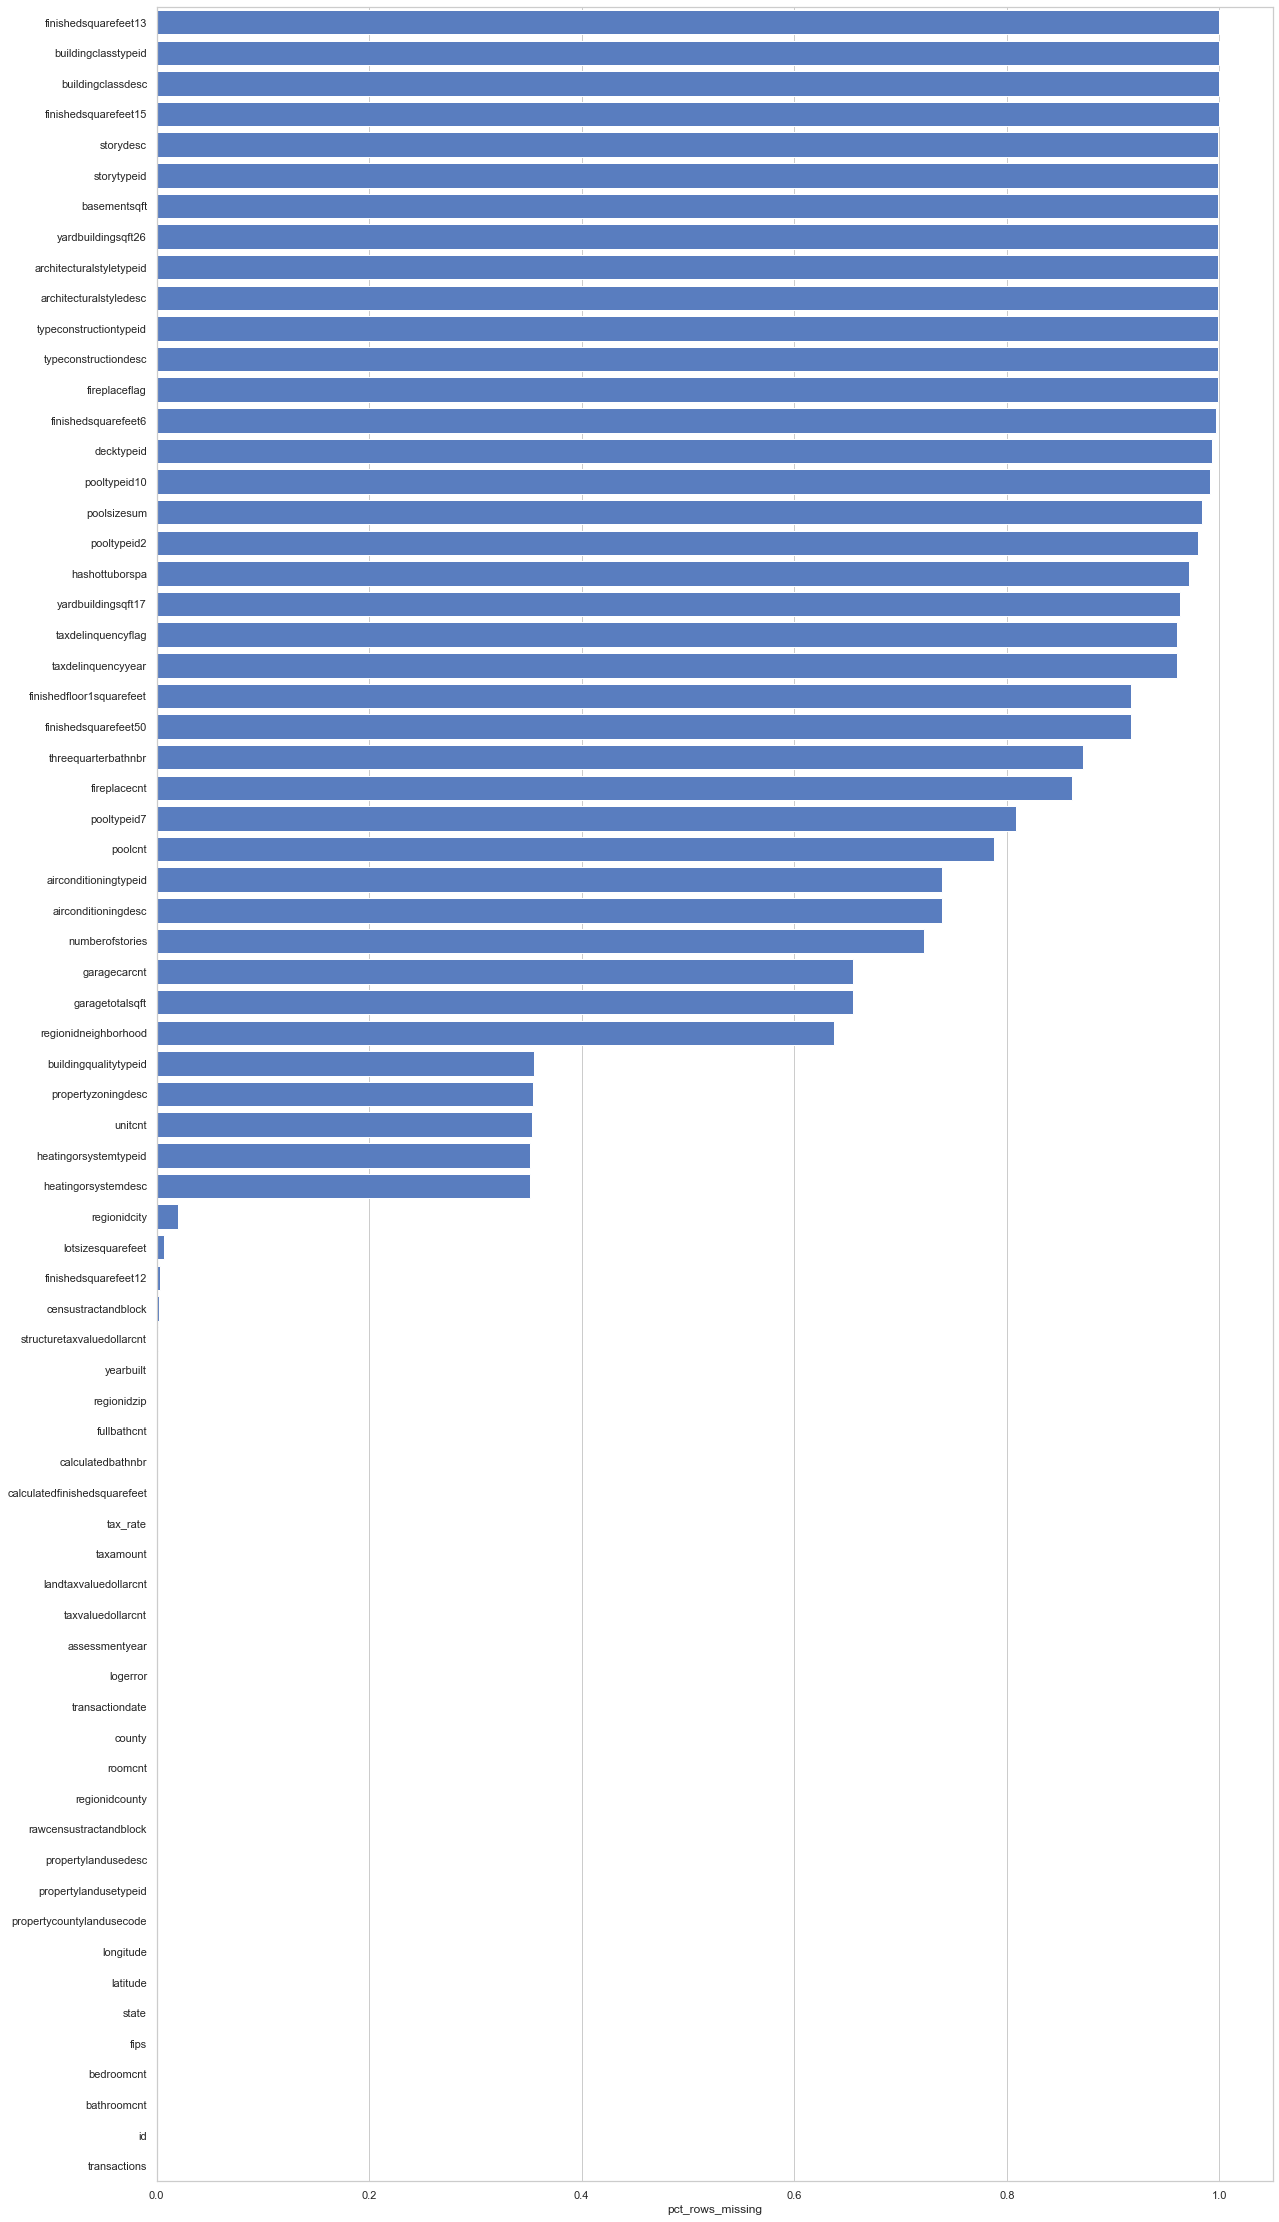

In [5]:
summarize.nulls_by_col(df)

We have decided that we want to remove the missing values.

**This function deals with missing values in the columns and the rows. If a row has more than 50% nulls, they will be removed. If a columns has more than 75% nulls, they will be removed.**

In [6]:
df = prepare.handle_missing_values(df, prop_required_column = .5, prop_required_row = .75)

In [7]:
df.shape

(52168, 37)

**Takeaway** Removed 39 columns with over 50% rows missing and over 75% columns missing

With the remaining missing values since they are under our set amount, we will impute them with either the mean or the mode of column. The following columns will need imputation.

With the following data exploration, we will also need to decide how to handle outliers

In [8]:
summarize.report_remain_nulls_by_col(df, 1)

num_rows_missing     pct_rows_missing
tax_rate                                     5                 0.00
buildingqualitytypeid                    18540                 0.36
calculatedbathnbr                           15                 0.00
calculatedfinishedsquarefeet                 7                 0.00
finishedsquarefeet12                       165                 0.00
fullbathcnt                                 15                 0.00
heatingorsystemtypeid                    18344                 0.35
heatingorsystemdesc                      18344                 0.35
lotsizesquarefeet                          354                 0.01
propertyzoningdesc                       18478                 0.35
regionidcity                              1028                 0.02
regionidzip                                 23                 0.00
unitcnt                                  18450                 0.35
yearbuilt                                   39                 0.00
structuretaxvaluedollarcnt                  72                 0.00
taxamount                                    4                 0.00
censustractandblock                        112                 0.00

# DATA EXPLORATION & PREPARATION

Right away, we know that we want to change some features to best fit our plan of this project.

In [9]:
# remove unit counts of two and three
df = df [(df.unitcnt != 2) | (df.unitcnt != 3)]
# create new column to show age of house
df['age'] = 2017 - df.yearbuilt
# handle decimal place for longitude and latitude
df.loc[:,'latitude'] = df.loc[:,'latitude']/1e6
df.loc[:,'longitude'] = df.loc[:,'longitude']/1e6
# convert transactiondate into month/ categorical
df['transactiondate'] = pd.DatetimeIndex(df['transactiondate']).month

# calculatedfinishedsquarefeet with way less nulls than finishedsquarefeet12
# drop finishedsquarefeet12
df = df.drop(columns = ['propertycountylandusecode','fips','assessmentyear', 'regionidcounty','yearbuilt','propertylandusedesc','propertylandusetypeid','fullbathcnt','state','calculatedbathnbr','id','finishedsquarefeet12', 'buildingqualitytypeid', 'heatingorsystemtypeid', 'heatingorsystemdesc', 'propertyzoningdesc', 'propertyzoningdesc', 'unitcnt'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f21fcf8>,
      dtype=object)

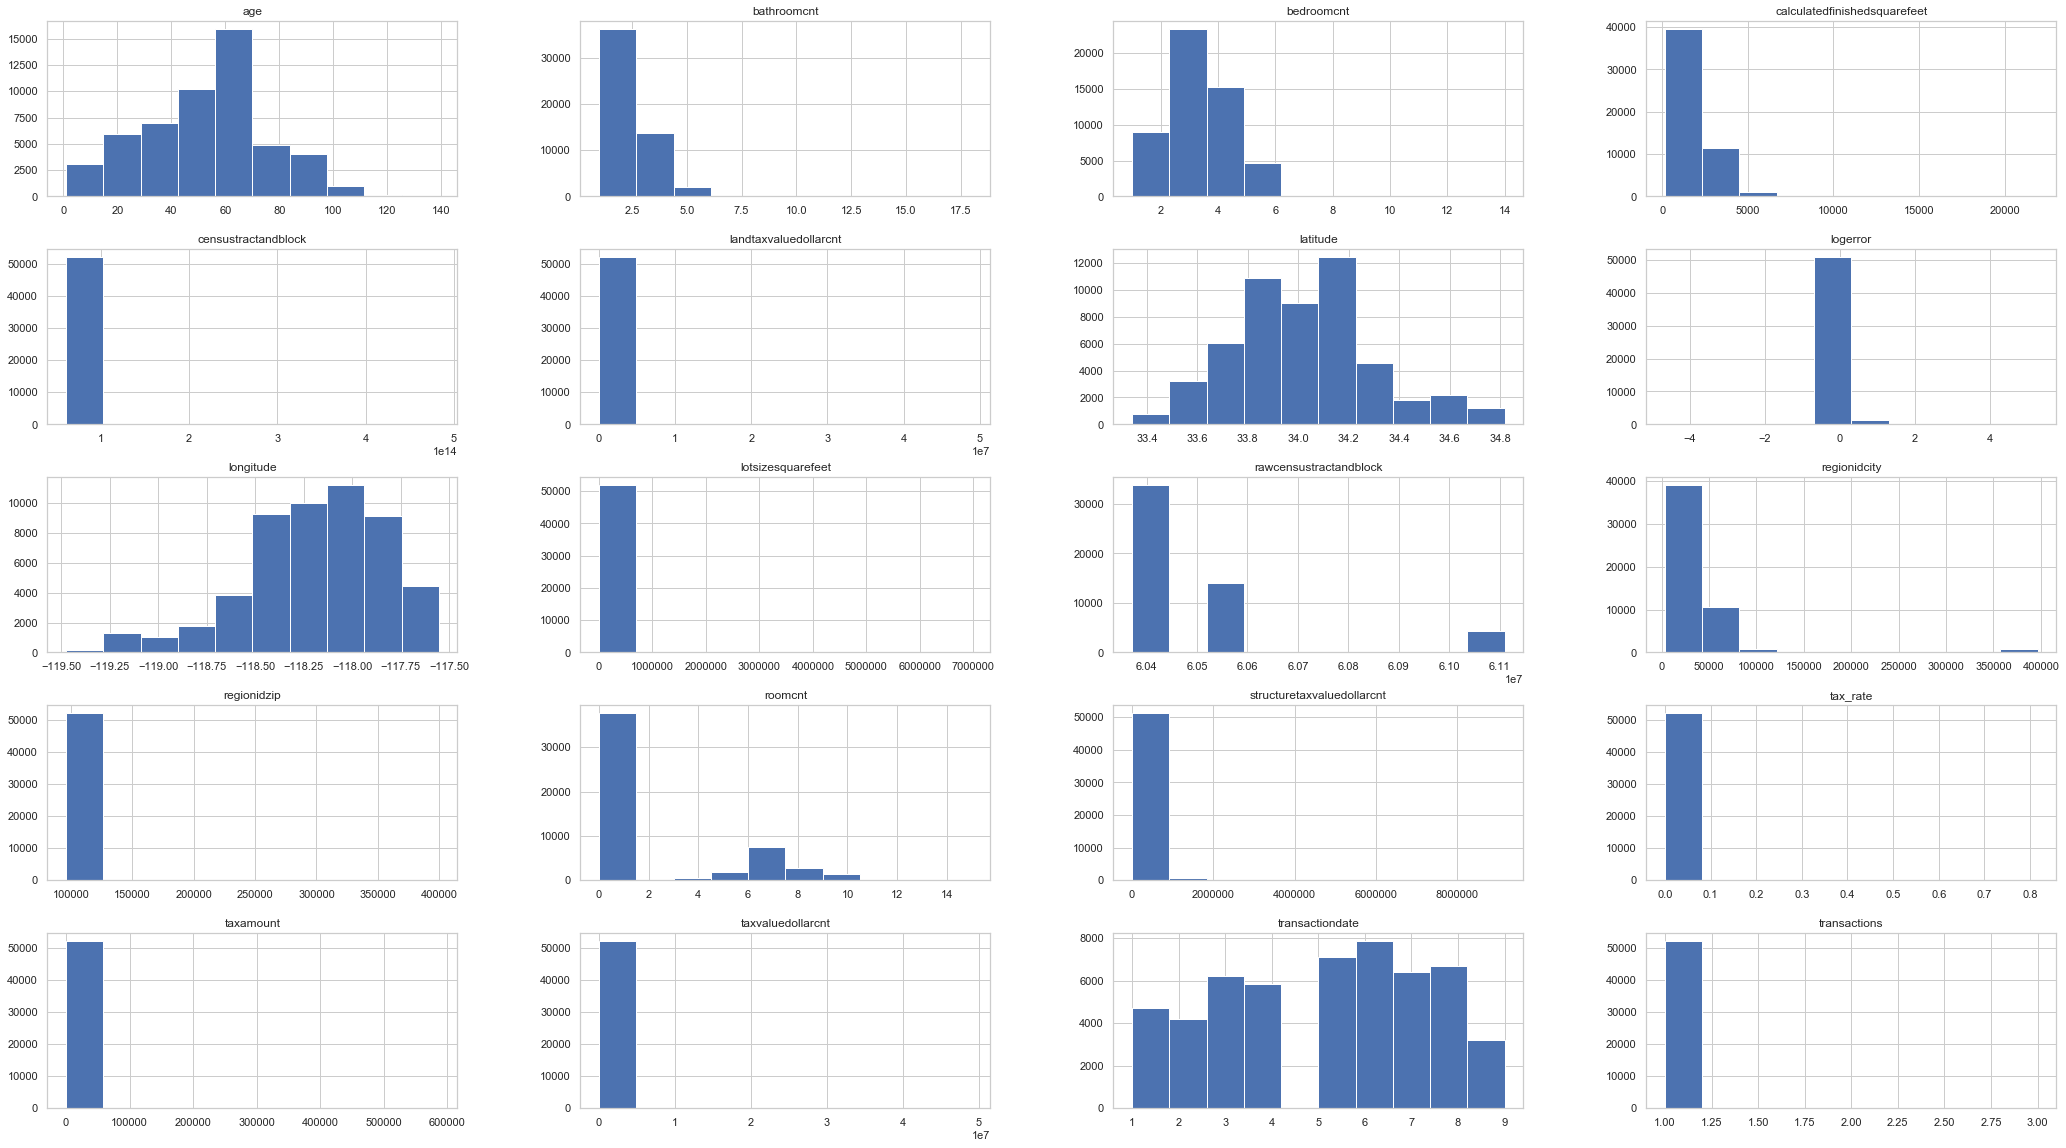

In [10]:
# Look for outliers
df.hist(figsize=(36,20))

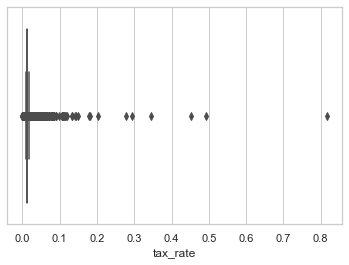

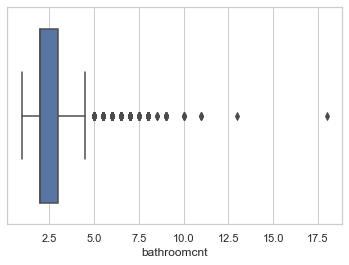

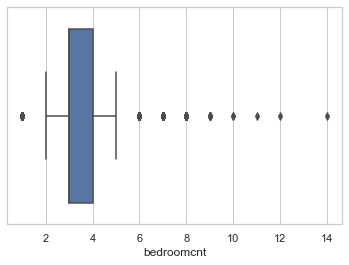

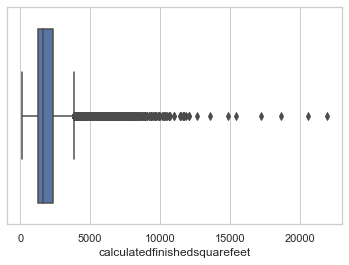

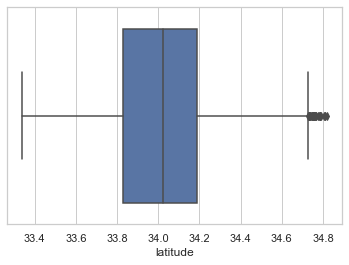

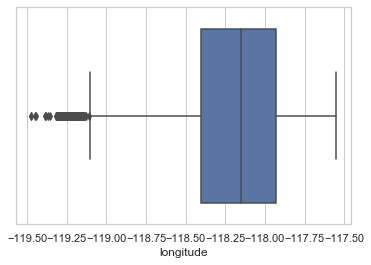

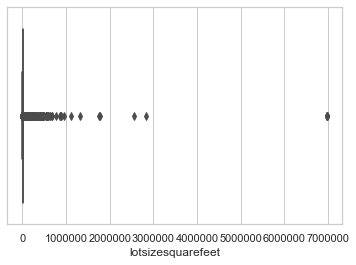

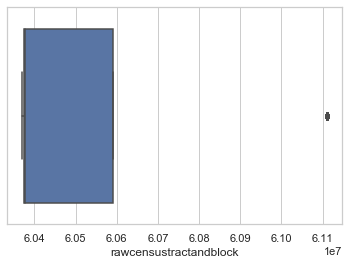

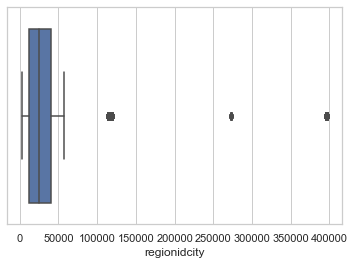

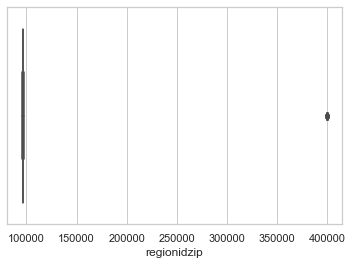

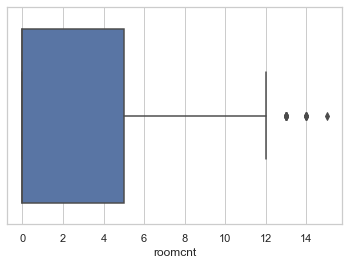

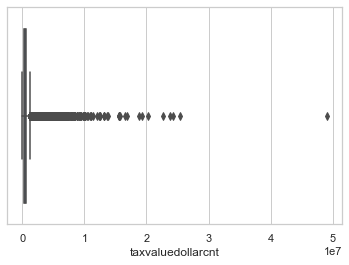

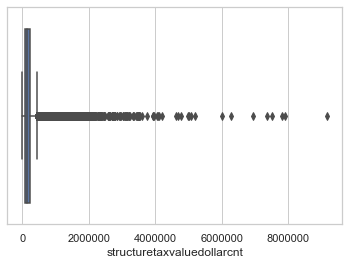

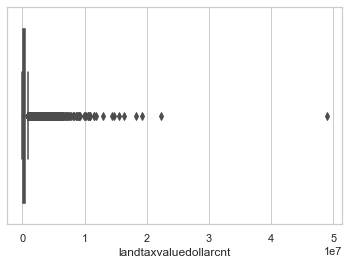

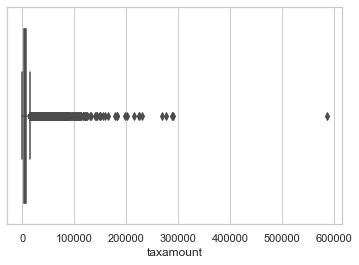

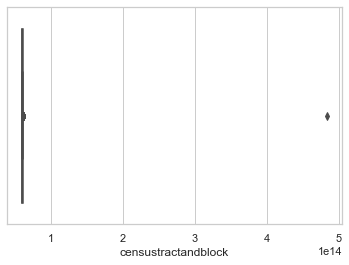

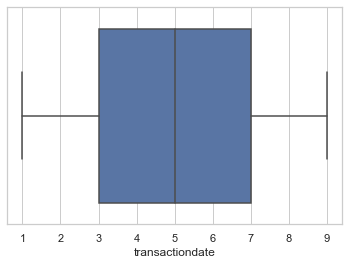

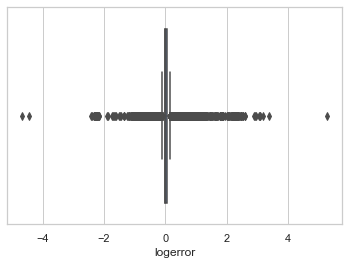

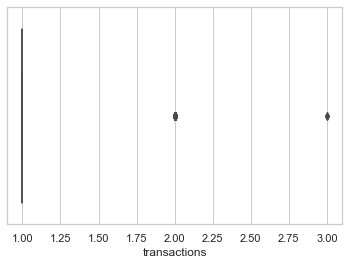

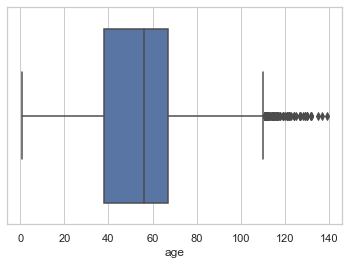

In [11]:
#visualize outliers in another way
explore.df_feature_box(df)

We want to remove outliers using our function to first identify IQR for each feature then drop anything 3X below lower bound or above upper bound, so our feature distributions are more evenly distributed.

In [12]:
# remove outlier
col_out = ["tax_rate", "bathroomcnt", "bedroomcnt","calculatedfinishedsquarefeet", "lotsizesquarefeet", "roomcnt", "taxamount"]

In [13]:
def remove_outliers_iqr(df, col_out):
    for col in enumerate(col_out):
        col = str(col[1])
        
        q1, q3 = df[col].quantile([.25, .75])
        iqr = q3 - q1
        ub = q3 + 3 * iqr
        lb = q1 - 3 * iqr

        df = df[df[col] <= ub]
        df = df[df[col] >= lb]
    return df

In [14]:
df = remove_outliers_iqr(df, col_out)

In [15]:
df = df[['county','latitude', 'longitude','regionidcity','regionidzip',\
         'rawcensustractandblock','censustractandblock',\
         'bathroomcnt', 'bedroomcnt','roomcnt',\
         'calculatedfinishedsquarefeet','lotsizesquarefeet',\
        'tax_rate','taxvaluedollarcnt',\
       'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount',\
        'transactiondate','age','transactions','logerror']]

In [16]:
# In removing the outliers, our values dropped from around 50,000 to around 44,000.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44749 entries, 17052889 to 13976300
Data columns (total 21 columns):
county                          44749 non-null object
latitude                        44749 non-null float64
longitude                       44749 non-null float64
regionidcity                    43939 non-null float64
regionidzip                     44739 non-null float64
rawcensustractandblock          44749 non-null float64
censustractandblock             44703 non-null float64
bathroomcnt                     44749 non-null float64
bedroomcnt                      44749 non-null int64
roomcnt                         44749 non-null int64
calculatedfinishedsquarefeet    44749 non-null float64
lotsizesquarefeet               44749 non-null float64
tax_rate                        44749 non-null float64
taxvaluedollarcnt               44749 non-null float64
structuretaxvaluedollarcnt      44714 non-null float64
landtaxvaluedollarcnt           44749 non-null float64
taxamo

In continuing with our exploration, we will split our data into train and test to be able to impute the remaining missing values.

**Split into train/ test** train_size = 0.8, random_state = 123

In [17]:
train, test = prepare.split_my_data(df)

In [18]:
col_impute_mean = ['tax_rate', 'calculatedfinishedsquarefeet', 'lotsizesquarefeet', 
                   'taxvaluedollarcnt', 'structuretaxvaluedollarcnt', 'landtaxvaluedollarcnt', 'taxamount']

col_impute_mode = ['regionidcity', 'regionidzip','censustractandblock']

In [19]:
train, test = prepare.impute(train, test, "mean", col_impute_mean)
train, test = prepare.impute(train, test, "most_frequent", col_impute_mode)

In [20]:
# Change the dtypes into something more appropriate for our modeling plan.

In [20]:
df["transactions"] = df.transactions.astype("float")

df["bedroomcnt"] = df.bedroomcnt.astype("int")
df["roomcnt"] = df.roomcnt.astype("int")

df["regionidcity"] = df.regionidcity.astype("object")
df["regionidzip"] = df.regionidzip.astype("object")

train["transactions"] = train.transactions.astype("float")

train["bedroomcnt"] = train.bedroomcnt.astype("int")
train["roomcnt"] = train.roomcnt.astype("int")

train["regionidcity"] = train.regionidcity.astype("object")
train["regionidzip"] = train.regionidzip.astype("object")

test["transactions"] = test.transactions.astype("float")

test["bedroomcnt"] = test.bedroomcnt.astype("int")
test["roomcnt"] = test.roomcnt.astype("int")

test["regionidcity"] = test.regionidcity.astype("object")
test["regionidzip"] = test.regionidzip.astype("object")


In [21]:
# Double checking the shape of each dataframe.
print(df.shape)
print(train.shape)
print(test.shape)

(44749, 21)
(35087, 21)
(8772, 21)


**Scaling the data**

We chose to use two different scaler methods, the MinMax Scaler and the Standard Scaler. 
- We chose the MinMax Scaler for 'latitude' and 'longitude' beacause we don't care about their distribution. We want the scaled data to still represent equal spacing.
- We chose the Standard Scaler for the other 5 we chose to scale because we want to keep the shape of the distribution structure for those features.

In [22]:
mm = ['latitude','longitude']
std = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']

In [23]:
scaler, train_scaled, test_scaled = split_scale.standard_scaler\
(train[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']],\
test[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']])

train1 = train.drop(columns = std)
train1 = train1.join(train_scaled)
test1 = test.drop(columns = std)
test1 = test1.join(test_scaled)

In [24]:
scaler, train_scaled, test_scaled = split_scale.min_max_scaler\
(train[['latitude','longitude']], test[['latitude','longitude']])

train1 = train1.drop(columns = mm)
train1 = train1.join(train_scaled)
test1 = test1.drop(columns = mm)
test1 = test1.join(test_scaled)

In [25]:
train1.head()

county         regionidcity          regionidzip  \
parcelid                                                          
14115188       Orange            16,764.00            97,021.00   
17202081      Ventura            25,974.00            97,097.00   
11867910  Los Angeles            50,677.00            96,531.00   
12888153  Los Angeles            20,008.00            96,506.00   
17055276      Ventura            13,091.00            97,099.00   

          rawcensustractandblock   censustractandblock  roomcnt  \
parcelid                                                          
14115188           60,590,871.06 60,590,871,061,001.00        6   
17202081           61,110,076.10 61,110,076,101,023.00        7   
11867910           60,374,808.04 60,374,808,042,002.00        0   
12888153           60,374,024.02 60,374,024,023,004.00        0   
17055276           61,110,009.03 61,110,009,031,015.00        6   

                     tax_rate    taxvaluedollarcnt  \
parcelid                                             
14115188                 0.01           476,345.00   
17202081                 0.01           269,973.00   
11867910                 0.01            92,656.00   
12888153                 0.01           288,484.00   
17055276                 0.01           820,000.00   

          structuretaxvaluedollarcnt  landtaxvaluedollarcnt  ...  \
parcelid                                                     ...   
14115188                   69,937.00             406,408.00  ...   
17202081                  175,489.00              94,484.00  ...   
11867910                   16,174.00              76,482.00  ...   
12888153                  117,834.00             170,650.00  ...   
17055276                  287,000.00             533,000.00  ...   

          transactiondate         transactions             logerror  \
parcelid                                                              
14115188                8                 1.00                -0.01   
17202081                7                 1.00                 0.07   
11867910                5                 1.00                -0.02   
12888153                4                 1.00                 0.03   
17055276                6                 1.00                 0.09   

                  bathroomcnt           bedroomcnt  \
parcelid                                             
14115188                -0.21                -0.29   
17202081                 0.39                -0.29   
11867910                -1.42                -1.43   
12888153                -1.42                -0.29   
17055276                -0.82                -1.43   

          calculatedfinishedsquarefeet    lotsizesquarefeet  \
parcelid                                                      
14115188                         -0.59                -0.16   
17202081                         -0.01                -0.05   
11867910                         -1.34                 0.21   
12888153                         -0.91                -0.27   
17055276                         -0.62                 1.22   

                          age             latitude            longitude  
parcelid                                                                 
14115188                 0.18                 0.35                 0.81  
17202081                -1.13                 0.67                 0.30  
11867910                 1.80                 0.55                 0.69  
12888153                 0.68                 0.51                 0.89  
17055276                 1.58                 0.80                 0.11  

[5 rows x 21 columns]

In [27]:
# relooking at the distribution of numeric features

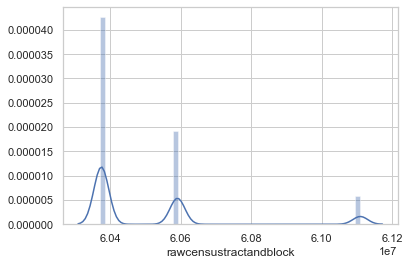

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


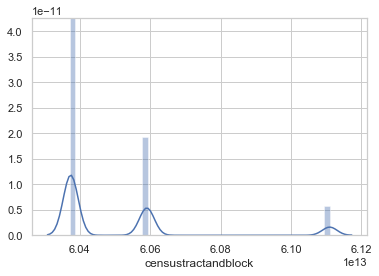

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


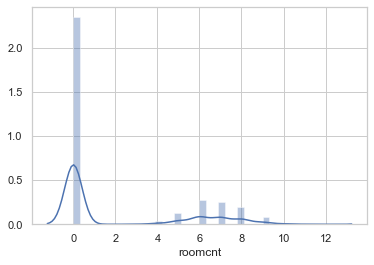

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


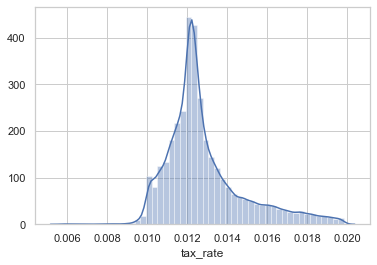

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


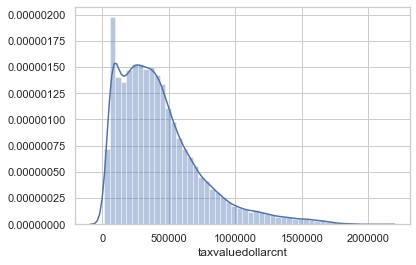

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


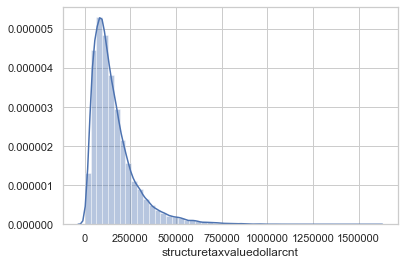

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


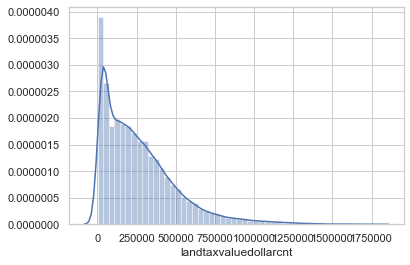

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


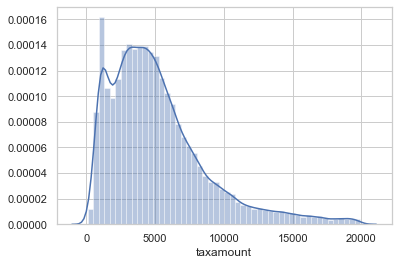

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


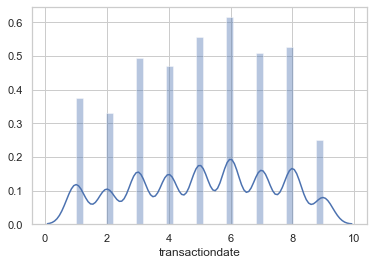

6    5231
5    4737
8    4476
7    4322
3    4195
4    3994
1    3190
2    2806
9    2136
Name: transactiondate, dtype: int64


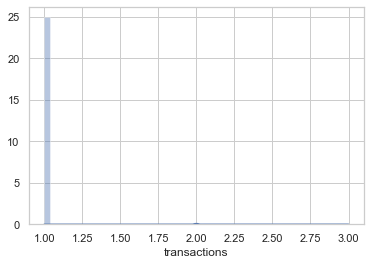

1.00    35013
2.00       73
3.00        1
Name: transactions, dtype: int64


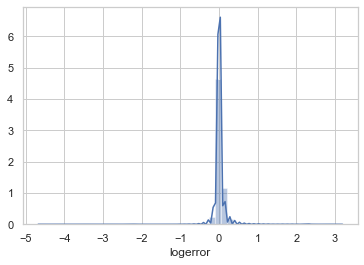

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


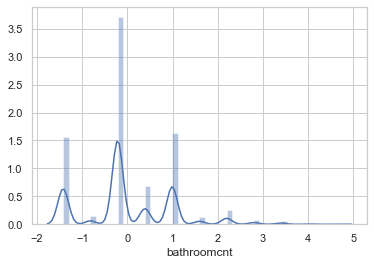

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


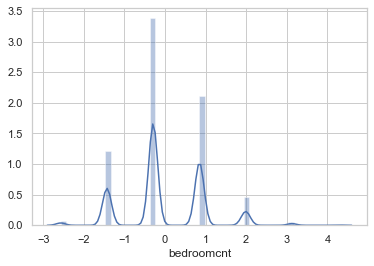

-0.29    16223
 0.85    10154
-1.43     5822
 1.99     2207
-2.57      375
 3.13      267
 4.27       39
Name: bedroomcnt, dtype: int64


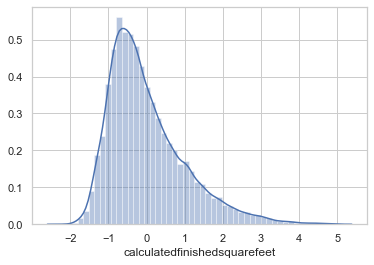

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


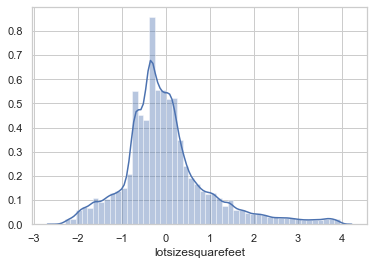

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


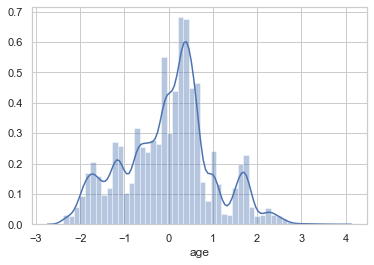

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


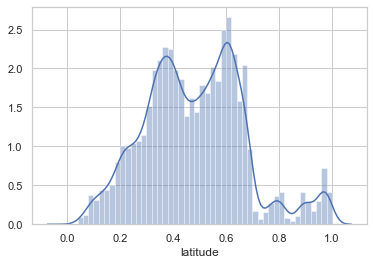

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


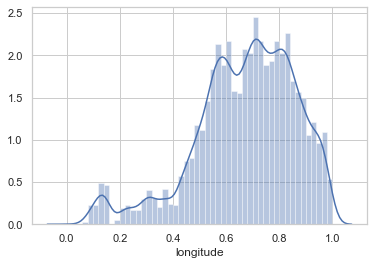

(0.0819, 0.699]     11733
(-0.536, 0.0819]     7082
(-1.153, -0.536]     4621
(-1.771, -1.153]     3688
(1.317, 1.935]       2750
(0.699, 1.317]       2707
(-2.396, -1.771]     1645
(1.935, 2.552]        725
(2.552, 3.17]         122
(3.17, 3.788]          14
Name: age, dtype: int64


In [26]:
num_plot = list(train1.select_dtypes(np.number).columns)
for n in num_plot:
    sns.distplot(train1[n].dropna())
    plt.show()
    if train1[n].nunique() > 10:
        print(train1.age.value_counts(bins = 10))
    else:
        print(train1[n].value_counts())

In [29]:
# Relook at the summary for each reconstructed feature.

In [27]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(df.describe())

                  latitude            longitude  rawcensustractandblock  \
count            44,749.00            44,749.00               44,749.00   
mean                 34.00              -118.19           60,498,234.65   
std                   0.26                 0.36              208,557.53   
min                  33.34              -119.48           60,371,011.10   
25%                  33.82              -118.39           60,374,006.02   
50%                  34.00              -118.14           60,376,021.06   
75%                  34.18              -117.92           60,590,524.10   
max                  34.72              -117.55           61,110,091.00   

         censustractandblock          bathroomcnt           bedroomcnt  \
count              44,703.00            44,749.00            44,749.00   
mean   60,507,465,377,727.27                 2.19                 3.25   
std     2,009,274,071,473.51                 0.84                 0.88   
min    60,371,011,101,000.00

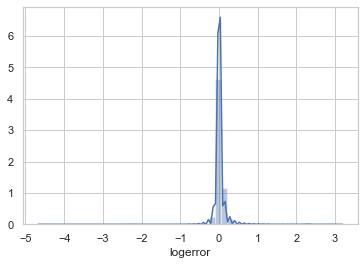

In [28]:
# overall logerror distribution 
sns.distplot(df.logerror)

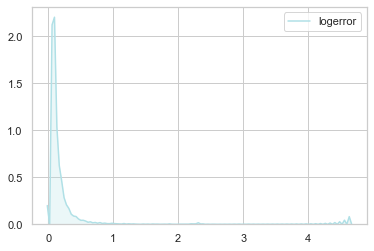

In [29]:
# absolute value of logerror
sns.kdeplot(df.logerror.abs(), shade=True, color="powderblue")
plt.show()

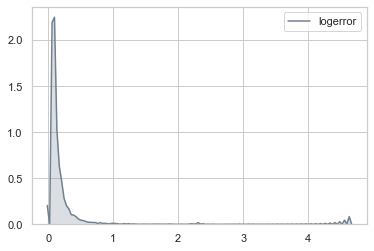

In [30]:
sns.kdeplot(train1.logerror.abs(), shade=True, color="slategray")

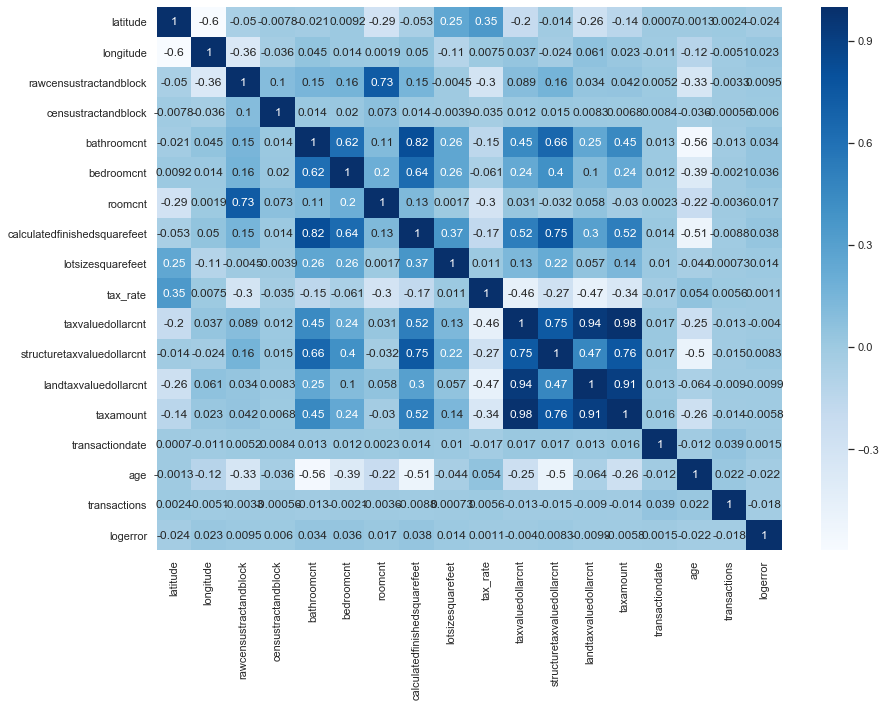

In [31]:
# Overall correlation of the features and the target.
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), cmap='Blues', annot=True)

In [32]:
train.corr()

latitude            longitude  \
latitude                                     1.00                -0.59   
longitude                                   -0.59                 1.00   
rawcensustractandblock                      -0.04                -0.38   
censustractandblock                         -0.04                -0.38   
bathroomcnt                                 -0.03                 0.05   
bedroomcnt                                   0.01                 0.01   
roomcnt                                     -0.28                -0.00   
calculatedfinishedsquarefeet                -0.06                 0.05   
lotsizesquarefeet                            0.26                -0.11   
tax_rate                                     0.34                 0.02   
taxvaluedollarcnt                           -0.20                 0.04   
structuretaxvaluedollarcnt                  -0.02                -0.02   
landtaxvaluedollarcnt                       -0.26                 0.06   
taxamount                                   -0.15                 0.03   
transactiondate                             -0.01                -0.01   
age                                          0.01                -0.13   
transactions                                 0.01                -0.01   
logerror                                    -0.03                 0.02   

                              rawcensustractandblock  censustractandblock  \
latitude                                       -0.04                -0.04   
longitude                                      -0.38                -0.38   
rawcensustractandblock                          1.00                 1.00   
censustractandblock                             1.00                 1.00   
bathroomcnt                                     0.15                 0.15   
bedroomcnt                                      0.16                 0.16   
roomcnt                                         0.73                 0.73   
calculatedfinishedsquarefeet                    0.16                 0.16   
lotsizesquarefeet                              -0.00                -0.00   
tax_rate                                       -0.30                -0.30   
taxvaluedollarcnt                               0.09                 0.09   
structuretaxvaluedollarcnt                      0.16                 0.16   
landtaxvaluedollarcnt                           0.04                 0.04   
taxamount                                       0.05                 0.05   
transactiondate                                 0.00                 0.00   
age                                            -0.34                -0.34   
transactions                                   -0.01                -0.01   
logerror                                        0.01                 0.01   

                                      bathroomcnt           bedroomcnt  \
latitude                                    -0.03                 0.01   
longitude                                    0.05                 0.01   
rawcensustractandblock                       0.15                 0.16   
censustractandblock                          0.15                 0.16   
bathroomcnt                                  1.00                 0.61   
bedroomcnt                                   0.61                 1.00   
roomcnt                                      0.12                 0.20   
calculatedfinishedsquarefeet                 0.82                 0.63   
lotsizesquarefeet                            0.26                 0.26   
tax_rate                                    -0.16                -0.06   
taxvaluedollarcnt                            0.45                 0.24   
structuretaxvaluedollarcnt                   0.65                 0.40   
landtaxvaluedollarcnt                        0.25                 0.11   
taxamount                                    0.45                 0.24   
transactiondate                              0.01           

**Takeaways:** Nothing huge stands out in regards to correlation with our taget, log error.

**Task:** Look closer at individual features with more visualizations and statistical testing.

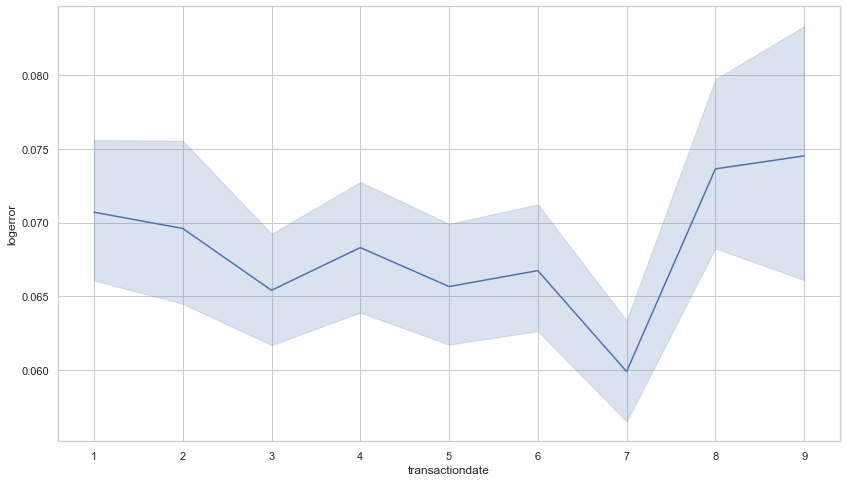

In [33]:
plt.figure(figsize=(14,8))
sns.lineplot(train.transactiondate, train.logerror.abs())

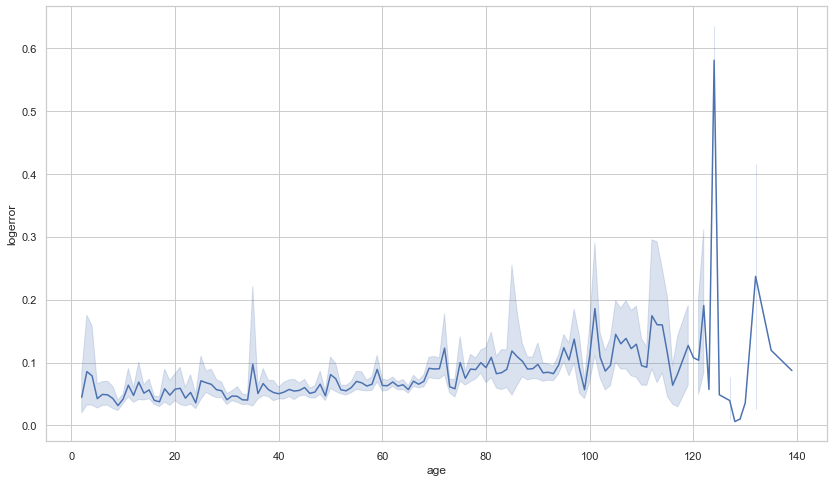

In [34]:
plt.figure(figsize=(14,8))
sns.lineplot(x = train.age, y = train.logerror.abs())

In [35]:
r, p = stats.pearsonr(train.age, train.logerror)
print('r:',r, 'p:',p)

r: -0.023391296591064873 p: 1.1760032044885623e-05


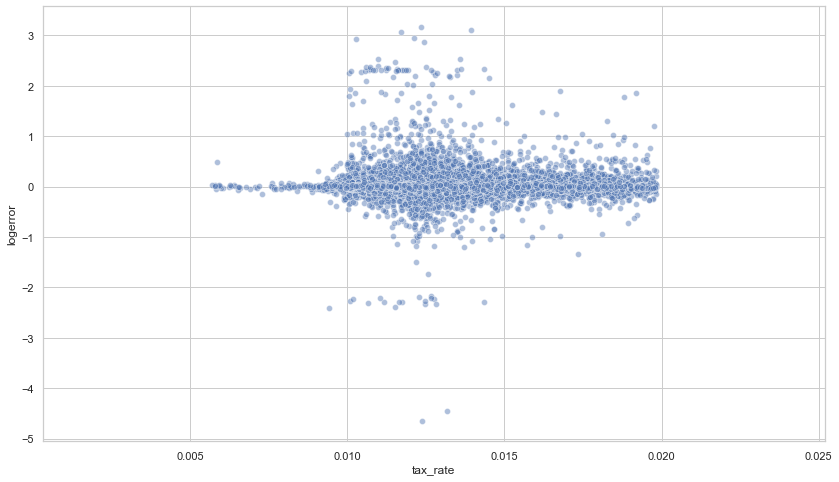

In [36]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='tax_rate', y='logerror', data=train, alpha=.45)

In [37]:
r, p = stats.pearsonr(train.tax_rate, train.logerror)
print('r:',r, 'p:',p)

r: 5.962866949089842e-05 p: 0.9910886439291061


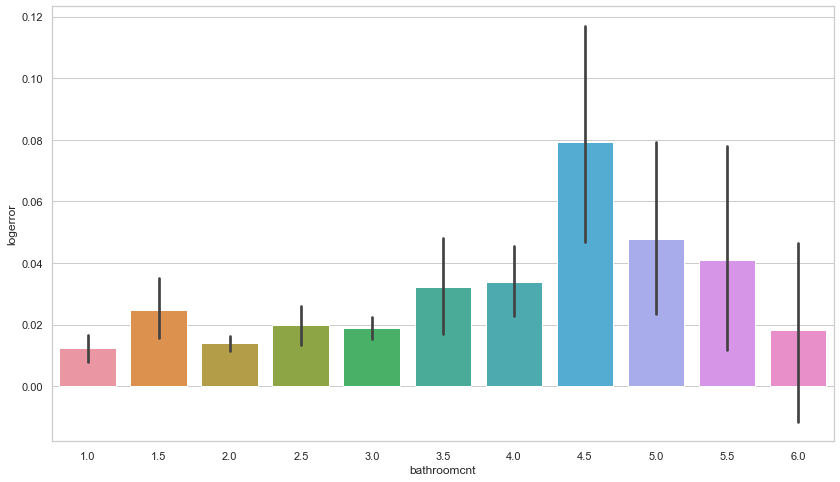

In [38]:
plt.figure(figsize=(14,8))
sns.barplot(x='bathroomcnt', y='logerror', data=train)

In [39]:
r, p = stats.pearsonr(train.bathroomcnt, train.logerror)
print('r:',r, 'p:',p)

r: 0.0344269366245435 p: 1.1157581250136825e-10


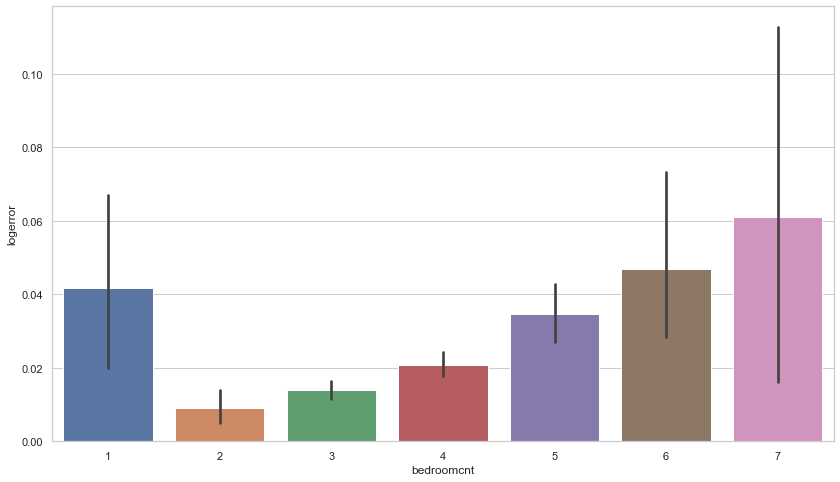

In [40]:
plt.figure(figsize=(14,8))
sns.barplot(x='bedroomcnt', y='logerror', data=train)

In [41]:
r, p = stats.pearsonr(train.bedroomcnt, train.logerror)
print('r:',r, 'p:',p)

r: 0.03368630254077798 p: 2.7630050113503756e-10


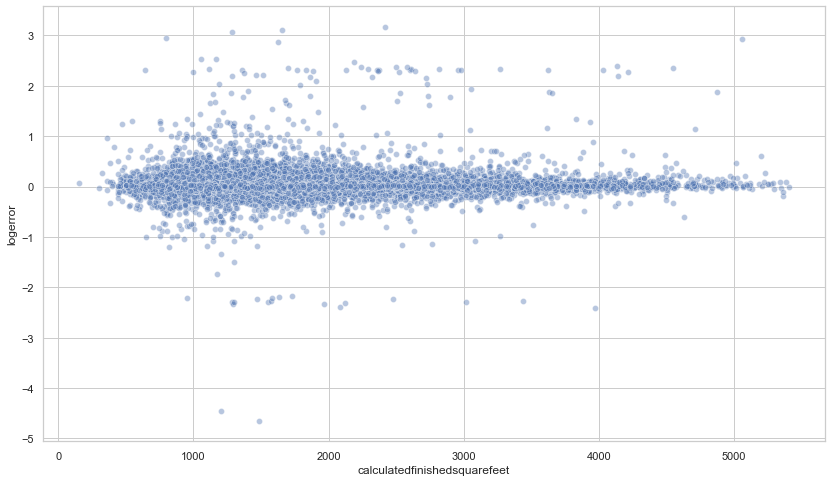

In [42]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='calculatedfinishedsquarefeet', y='logerror', data=train, alpha=.4)

In [43]:
r, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)
print('r:',r, 'p:',p)

r: 0.03874507300022096 p: 3.8706163630304396e-13


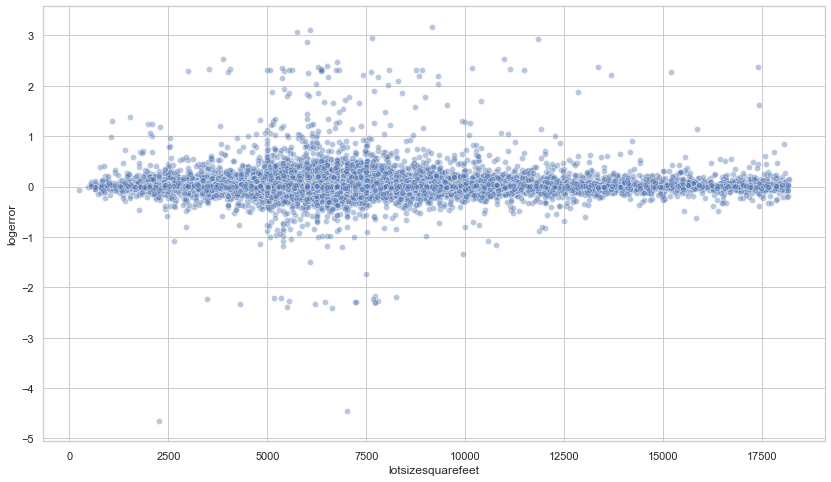

In [44]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='lotsizesquarefeet', y='logerror', data=train, alpha=.4)

In [45]:
r, p = stats.pearsonr(train.lotsizesquarefeet, train.logerror)
print('r:',r, 'p:',p)

r: 0.0102528690237866 p: 0.054794685125985086


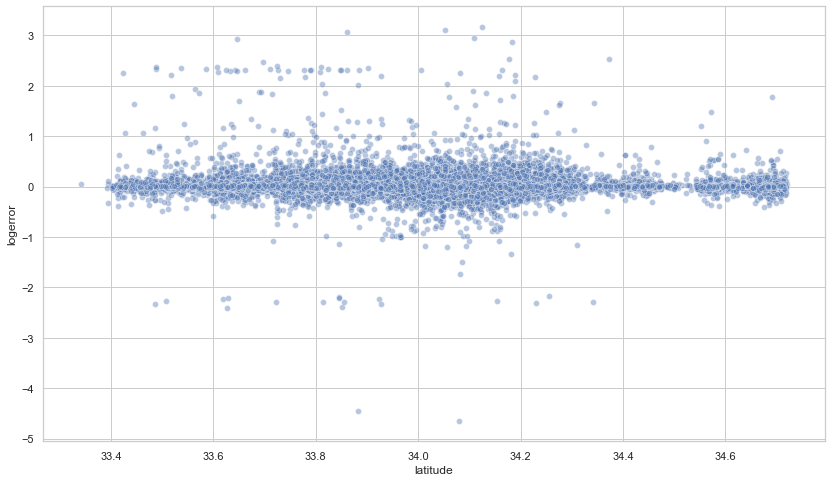

In [46]:
plt.figure(figsize=(14,8))
sns.scatterplot(x='latitude', y='logerror', data=train, alpha=.4)

In [47]:
r, p = stats.pearsonr(train.latitude, train.logerror)
print('r:',r, 'p:',p)

r: -0.025227814058630324 p: 2.2883031354739516e-06


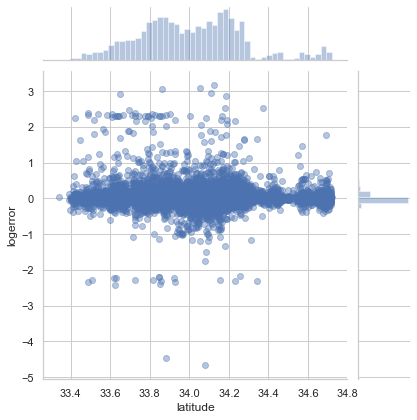

In [48]:
sns.jointplot(x='latitude', y='logerror', data=train, alpha=.4)

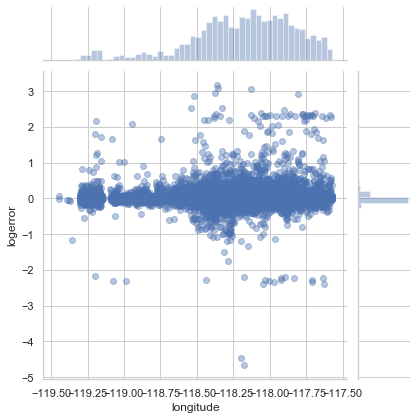

In [49]:
sns.jointplot(x='longitude', y='logerror', data=train, alpha=.4)

In [50]:
r, p = stats.pearsonr(train.longitude, train.logerror)
print('r:',r, 'p:',p)

r: 0.01971799065207356 p: 0.0002210078510970351


## More data exploration using Clustering

[[-1.18293801e+02  3.40424861e+01 -4.25441832e-01]
 [-1.17663979e+02  3.35679488e+01  1.54848163e-02]
 [-1.19171859e+02  3.42550477e+01  1.49921642e-02]
 [-1.18136413e+02  3.41209230e+01 -2.17210746e-03]
 [-1.18534353e+02  3.42148176e+01  1.04521453e-02]
 [-1.18144381e+02  3.46403393e+01  6.09418209e-03]
 [-1.18089155e+02  3.38716550e+01  2.20093103e+00]
 [-1.18065492e+02  3.39045208e+01  9.60726884e-01]
 [-1.18083688e+02  3.38689911e+01  2.18507865e-03]
 [-1.17933064e+02  3.36997484e+01  1.81832106e-03]
 [-1.18832695e+02  3.42331922e+01  1.15561407e-02]
 [-1.18010986e+02  3.38782753e+01  3.22870033e-01]
 [-1.18150302e+02  3.38930942e+01 -2.43204133e+00]
 [-1.18378298e+02  3.41228553e+01  3.59025887e-01]
 [-1.17842277e+02  3.38327924e+01  8.24091259e-03]
 [-1.18365565e+02  3.41153242e+01 -7.42790681e-03]
 [-1.17863692e+02  3.40633838e+01  1.00158387e-02]
 [-1.18318986e+02  3.38830580e+01  6.09684795e-03]
 [-1.18518654e+02  3.44237534e+01  1.11805557e-02]]
582.6569878898458


Text(0, 0.5, 'inertia')

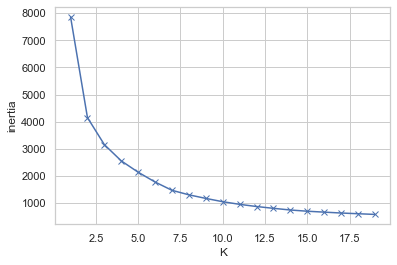

In [51]:
# Cluster logerror based on geological information (longitude and latitude)
subset = train[['longitude', 'latitude','logerror']]

k_values = []
inertias = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k).fit(subset)
    inertias.append(kmeans.inertia_)
    k_values.append(k)
print(kmeans.cluster_centers_)
# sum of squared errors from each data point to the cluster center
print(kmeans.inertia_)
plt.plot(k_values, inertias, marker='x')
plt.xlabel('K')
plt.ylabel('inertia')

In [52]:
train['logerror_abs'] = train.logerror.abs()
subset = train[['longitude', 'latitude','logerror']]
kmeans = KMeans(n_clusters=7).fit(subset)
centers = pd.DataFrame(kmeans.cluster_centers_, columns=subset.columns)

[Text(0.5, 0, 'Logerror'), Text(0.5, 0, 'Latitude'), Text(0.5, 0, 'Longitude')]

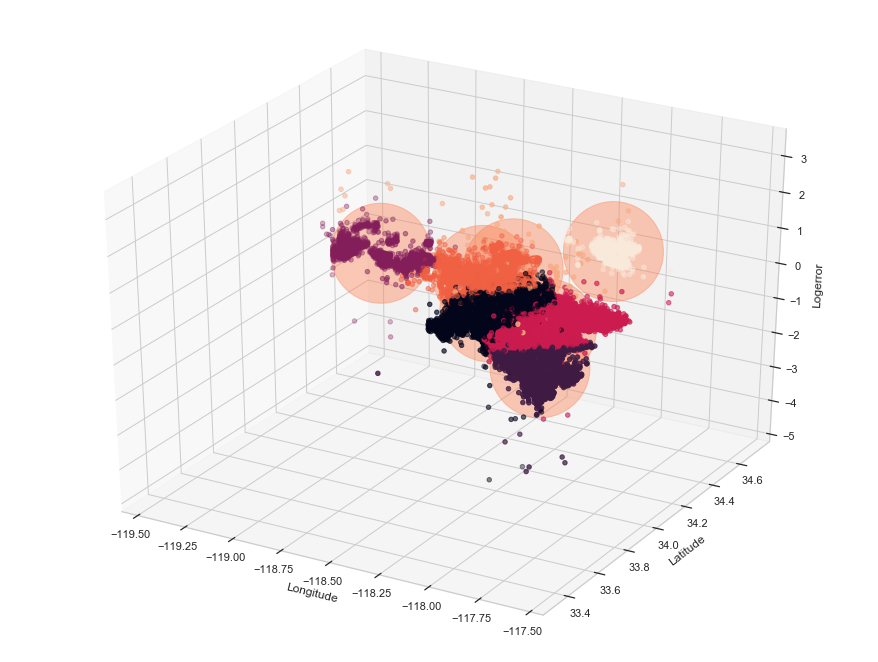

In [53]:
fig = plt.figure(figsize=(12, 9))
ax = Axes3D(fig)

ax.scatter(train.longitude, train.latitude, train.logerror, c=kmeans.labels_)
ax.scatter(centers.longitude, centers.latitude, centers.logerror, c='coral', s=10000, alpha=.4)
ax.set(xlabel='Longitude', ylabel='Latitude', zlabel='Logerror')

Text(0.5, 1.0, 'County Locations')

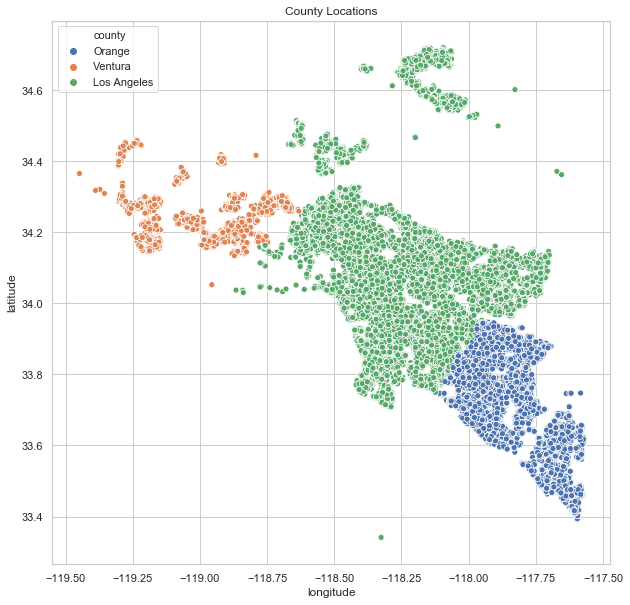

In [54]:
# first visualize location of each county
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x='longitude', y='latitude', data=train, hue='county')
ax.set_title("County Locations")

Text(0.5, 1.0, 'Distribution of Houses Based on House Age')

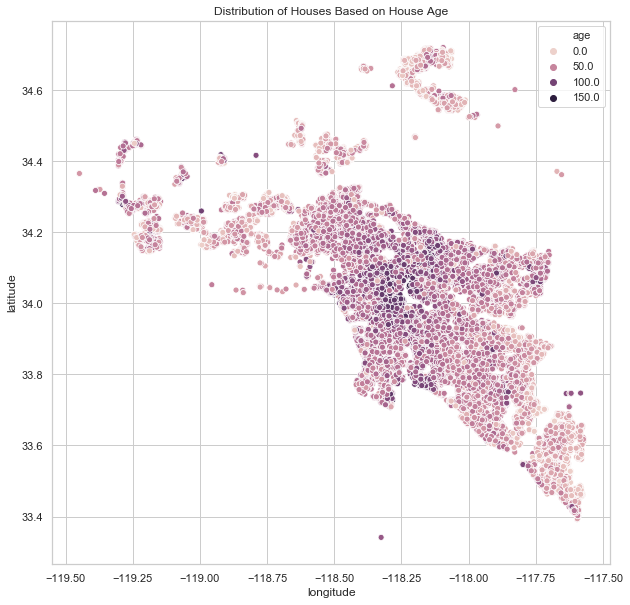

In [55]:
# property distrbution based on age of houses
# takeaway - overall, more older houses in LA county
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x='longitude', y='latitude', data=train, hue='age')
ax.set_title("Distribution of Houses Based on House Age")

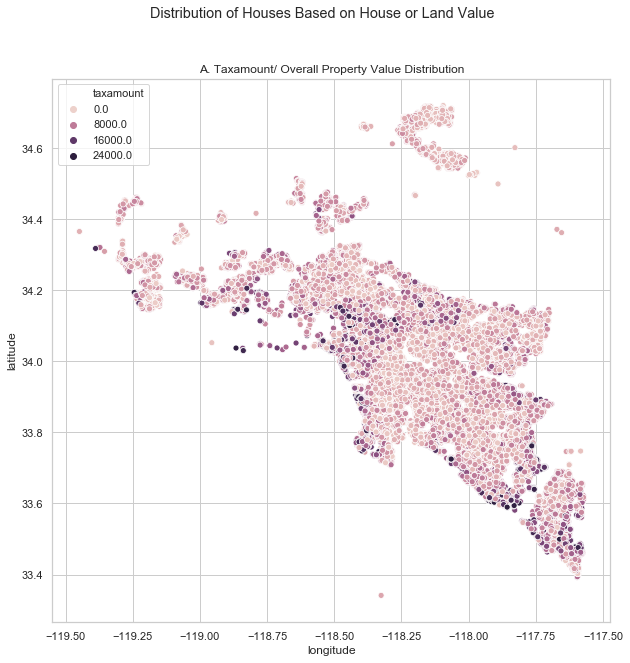

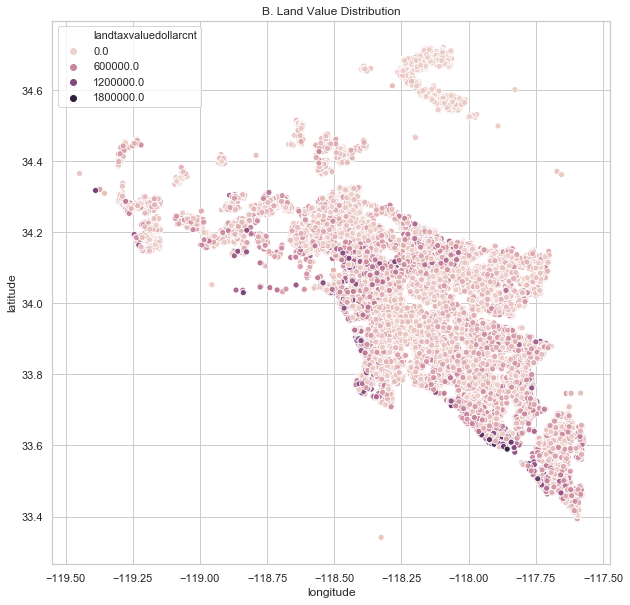

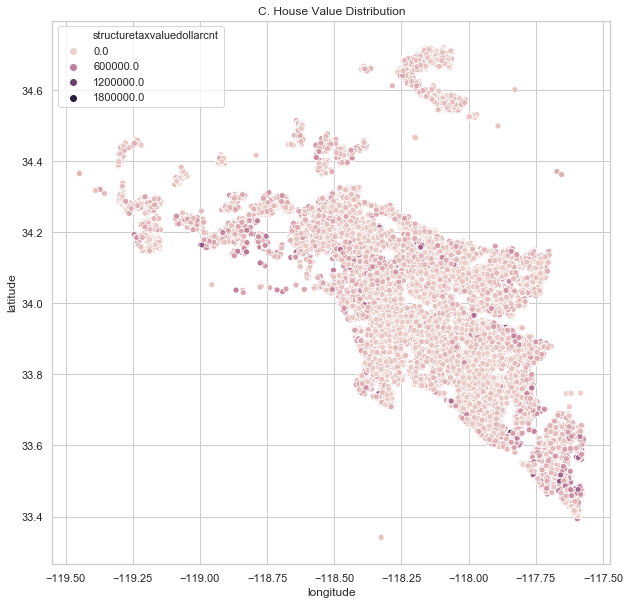

In [56]:
# Distribution of Houses Based on House or Land Value

# takeaway:
# From fig A & B, we can see the clusters of more expensive land reflected by actual tax 
# From fig C we cannot see cluster formation based on physical structure/ houses tax
# note that when plotting taxvaluedollarcnt on longitude/ latitude, the pattern is same as using taxamount

plt.figure(figsize = (10,10))

plt.suptitle("Distribution of Houses Based on House or Land Value")

ax = sns.scatterplot(x='longitude', y='latitude', data=train, hue='taxamount')
ax.set_title('A. Taxamount/ Overall Property Value Distribution')

plt.figure(figsize = (10,10))
ax = sns.scatterplot(x='longitude', y='latitude', data=train, hue='landtaxvaluedollarcnt')
ax.set_title('B. Land Value Distribution')

plt.figure(figsize = (10,10))
ax = sns.scatterplot(x='longitude', y='latitude', data=train, hue='structuretaxvaluedollarcnt')
ax.set_title('C. House Value Distribution')

plt.show()

In [57]:
train[['landtaxvaluedollarcnt','structuretaxvaluedollarcnt']].describe()

landtaxvaluedollarcnt  structuretaxvaluedollarcnt
count              35,087.00                   35,087.00
mean              268,102.18                  158,791.28
std               234,544.42                  122,641.53
min                 2,250.00                      148.00
25%                83,884.00                   76,629.00
50%               214,435.00                  125,786.00
75%               381,459.50                  202,602.00
max             1,771,963.00                1,594,102.00

(array([-5000.,     0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 7 Text xticklabel objects>)

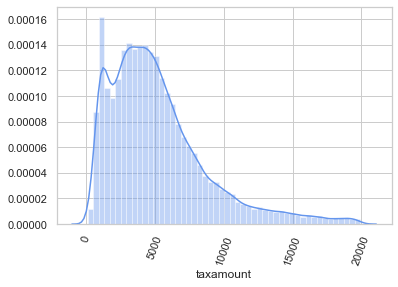

In [58]:
sns.distplot(train.taxamount, color = 'cornflowerblue')
plt.xticks(rotation=70)

(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000., 2000000.]),
 <a list of 10 Text xticklabel objects>)

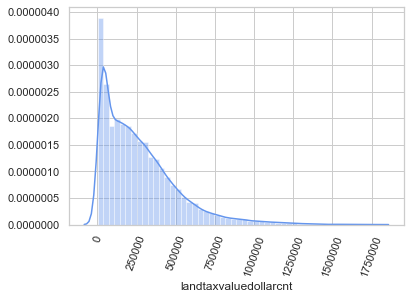

In [59]:
sns.distplot(train.landtaxvaluedollarcnt, color = 'cornflowerblue')
plt.xticks(rotation=70)

(array([-250000.,       0.,  250000.,  500000.,  750000., 1000000.,
        1250000., 1500000., 1750000.]), <a list of 9 Text xticklabel objects>)

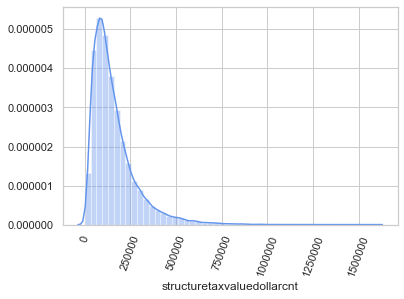

In [60]:
sns.distplot(train.structuretaxvaluedollarcnt, color = 'cornflowerblue')
plt.xticks(rotation=70)

Text(0.5, 1.0, 'A. Distribution of Houses/ Living Size')

<Figure size 432x288 with 0 Axes>

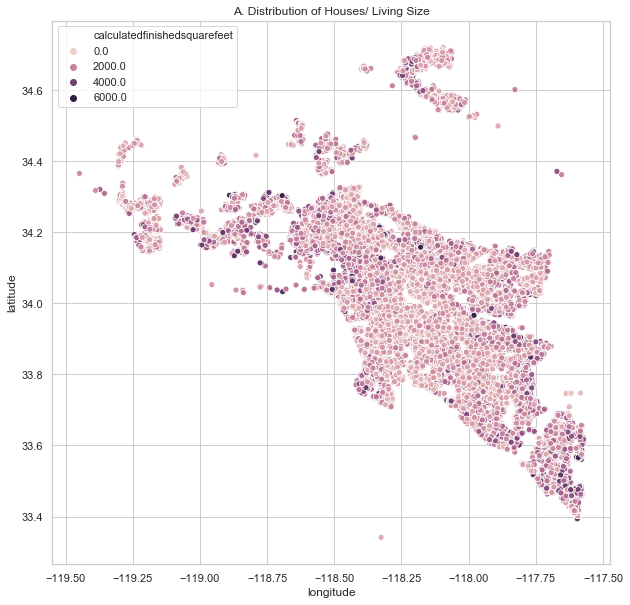

In [61]:
# Distribution of Houses Based on Living Size and Lotsize
# takeaway
# definitely some clusters of bigger houses
# refer to the following visual on lotsizesquarefeet, we see more distinct clusters when looking at lotsizesquarefeet

plt.suptitle("Distribution of Houses Based on Living Size and Lotsize")
plt.figure(figsize = (10,10))

ax = sns.scatterplot(x='longitude', y='latitude', data=train, hue='calculatedfinishedsquarefeet')
ax.set_title('A. Distribution of Houses/ Living Size')

Text(0.5, 1.0, 'B. Distribution of Houses/ Lot Size')

<Figure size 432x288 with 0 Axes>

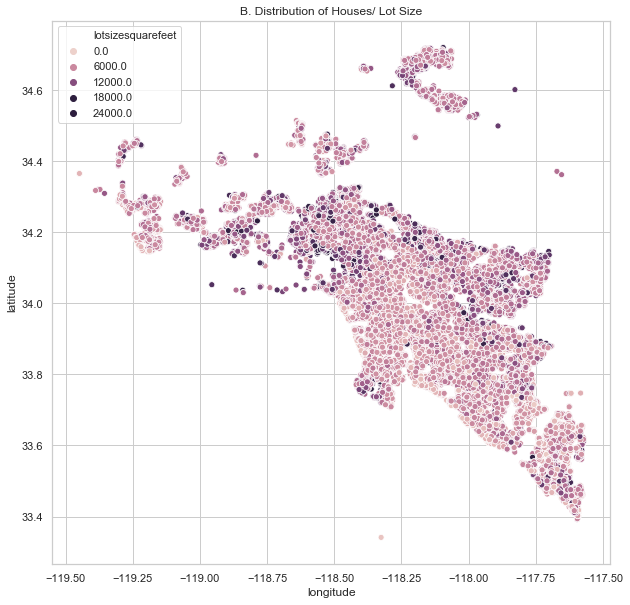

In [62]:
plt.suptitle("Distribution of Houses Based on Living Size and Lotsize")
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x='longitude', y='latitude', data=train, hue='lotsizesquarefeet')
ax.set_title('B. Distribution of Houses/ Lot Size')

In [63]:
# might be interesting to perform KMeans on lotsizesquarefeet vs logerror
train[['calculatedfinishedsquarefeet', 'lotsizesquarefeet']].describe()

calculatedfinishedsquarefeet    lotsizesquarefeet
count                     35,087.00            35,087.00
mean                       1,775.11             7,043.91
std                          722.87             2,806.75
min                          152.00               236.00
25%                        1,256.00             5,451.00
50%                        1,606.00             6,617.00
75%                        2,139.50             8,032.50
max                        5,408.00            18,170.00

**Takeaway**
1. When looking at the spectrun of all the house sizes, when compare logerror of much larger or much smaller houses (>75% or <25%) 


In [64]:
cond_1 = train[train.calculatedfinishedsquarefeet >= 2139.5].logerror
print(stats.ttest_1samp(cond_1, train.logerror.mean()))

Ttest_1sampResult(statistic=4.968715775488465, pvalue=6.867162759605644e-07)


In [65]:
cond_1 = train[train.calculatedfinishedsquarefeet >= 2139.5].logerror
cond_2 = train[train.calculatedfinishedsquarefeet <= 1256.0].logerror
print(stats.ttest_ind(cond_2,cond_1))

Ttest_indResult(statistic=-4.607816781477715, pvalue=4.097791637638067e-06)


In [66]:
cond_1 = train[train.lotsizesquarefeet >= 8032.5].logerror
print(stats.ttest_1samp(cond_1, train.logerror.mean()))

Ttest_1sampResult(statistic=1.8101686089559441, pvalue=0.07030385268701134)


In [67]:
cond_1 = train[train.lotsizesquarefeet >= 8032.5].logerror
cond_2 = train[train.lotsizesquarefeet <= 5451.0].logerror
print(stats.ttest_ind(cond_2,cond_1))

Ttest_indResult(statistic=-1.1644893483748997, pvalue=0.2442415928318881)


**Takeaway from Bed/Bath** 
- Can see distribution patterns in bath/bed vs location.  

In [68]:
train[['bathroomcnt', 'bedroomcnt']].describe()

bathroomcnt           bedroomcnt
count            35,087.00            35,087.00
mean                  2.18                 3.26
std                   0.83                 0.88
min                   1.00                 1.00
25%                   2.00                 3.00
50%                   2.00                 3.00
75%                   3.00                 4.00
max                   6.00                 7.00

In [69]:
cond_1 = train[train.bathroomcnt >= 5].logerror
print(stats.ttest_1samp(cond_1, train.logerror.mean()))

Ttest_1sampResult(statistic=2.4713447950858707, pvalue=0.014008424025655808)


In [70]:
cond_1 = train[train.bathroomcnt >= 5].logerror
cond_2 = train[train.bathroomcnt <= 2].logerror
print(stats.ttest_ind(cond_2,cond_1))

Ttest_indResult(statistic=-3.126976517639224, pvalue=0.001768316677966285)


In [71]:
cond_1 = train[train.bedroomcnt >= 5].logerror
print(stats.ttest_1samp(cond_1, train.logerror.mean()))

Ttest_1sampResult(statistic=5.127348467051905, pvalue=3.1624335267890137e-07)


In [72]:
cond_1 = train[train.bedroomcnt >= 5].logerror
cond_2 = train[train.bedroomcnt <= 2].logerror
print(stats.ttest_ind(cond_2,cond_1))

Ttest_indResult(statistic=-5.915484734350011, pvalue=3.4338685294941134e-09)


Text(0.5, 1.0, 'Distribution of Houses/ Based on the Number of Bedroom')

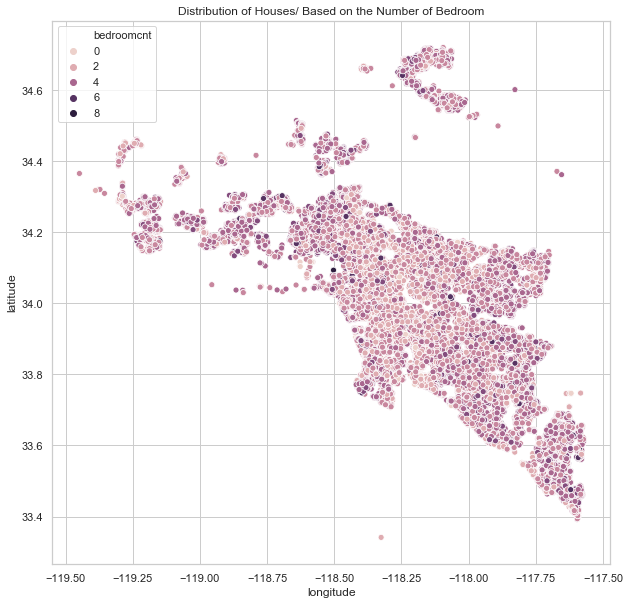

In [73]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x='longitude', y='latitude', data=train, hue='bedroomcnt')
ax.set_title("Distribution of Houses/ Based on the Number of Bedroom")

Text(0.5, 1.0, 'Distribution of Houses/ Based on the Number of Bathroom')

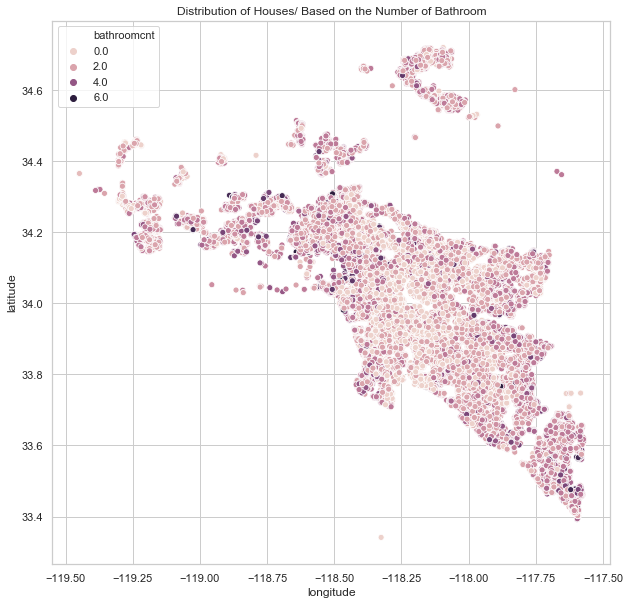

In [74]:
plt.figure(figsize = (10,10))
ax = sns.scatterplot(x='longitude', y='latitude', data=train, hue='bathroomcnt')
ax.set_title("Distribution of Houses/ Based on the Number of Bathroom")

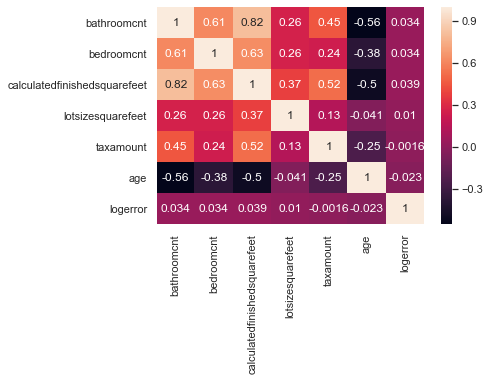

In [75]:
# correlation among the chosen features and the target
sns.heatmap(train[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','taxamount','age','logerror']].corr(), annot=True)

In [77]:
# kmeans = KMeans(n_clusters = 4)
# kmeans.fit(train[['lotsizesquarefeet']])

# train['lotsizesquarefeet_cluster'] = kmeans.predict(train[['lotsizesquarefeet']])
# train.age_cluster.value_counts()
# train.age_cluster = 'cluster_' + train.age_cluster.astype('str')

# plt.figure(figsize = (12,12))
# sns.scatterplot(x='longitude', y='latitude', data=train, hue='lotsizesquarefeet_cluster')

In [78]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35087 entries, 14115188 to 11065285
Data columns (total 23 columns):
county                          35087 non-null object
latitude                        35087 non-null float64
longitude                       35087 non-null float64
regionidcity                    35087 non-null object
regionidzip                     35087 non-null object
rawcensustractandblock          35087 non-null float64
censustractandblock             35087 non-null float64
bathroomcnt                     35087 non-null float64
bedroomcnt                      35087 non-null int64
roomcnt                         35087 non-null int64
calculatedfinishedsquarefeet    35087 non-null float64
lotsizesquarefeet               35087 non-null float64
tax_rate                        35087 non-null float64
taxvaluedollarcnt               35087 non-null float64
structuretaxvaluedollarcnt      35087 non-null float64
landtaxvaluedollarcnt           35087 non-null float64
taxamoun

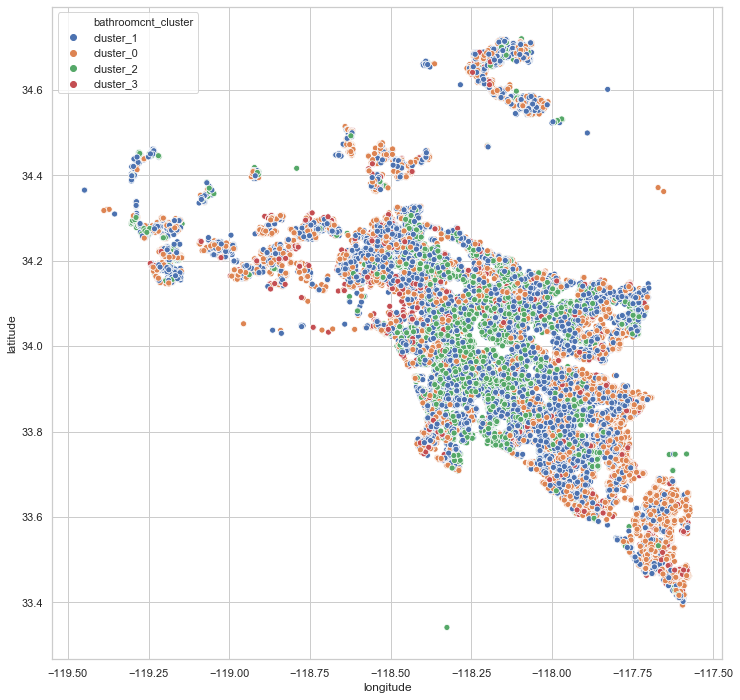

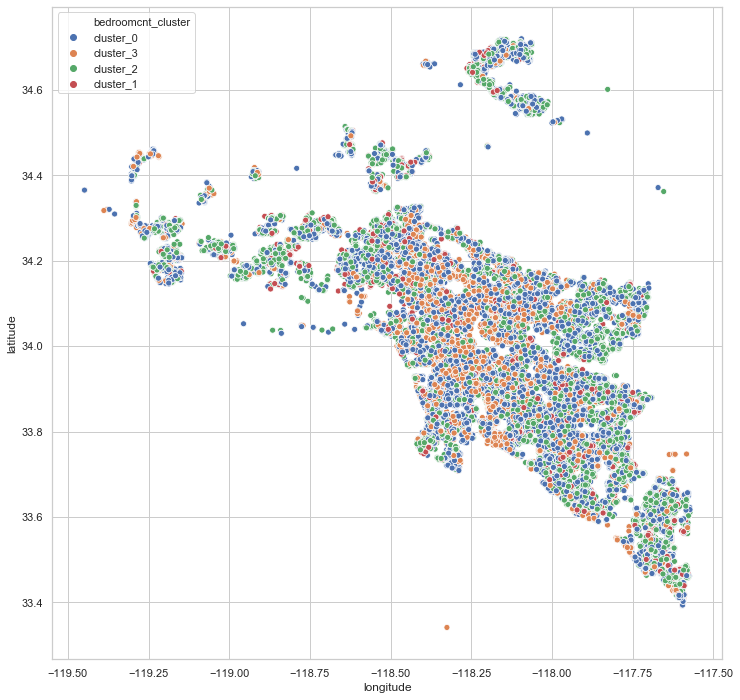

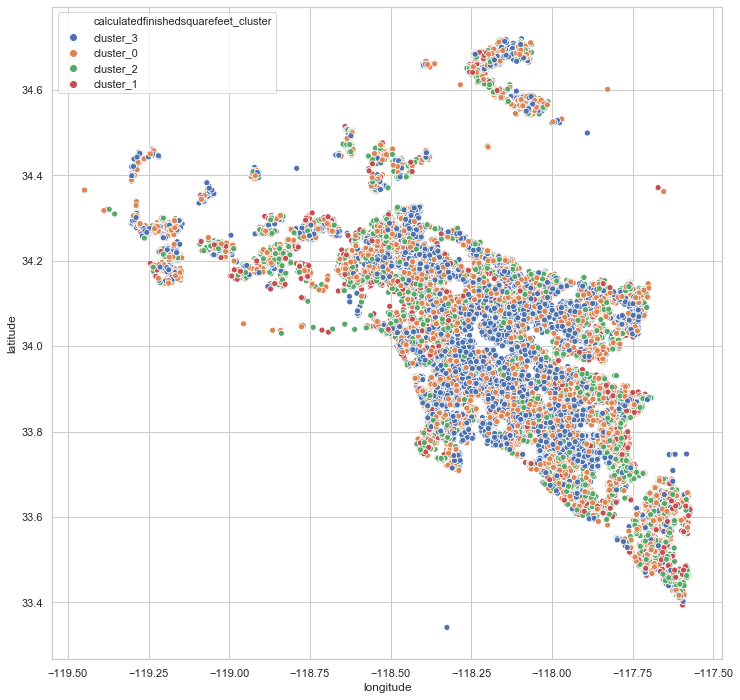

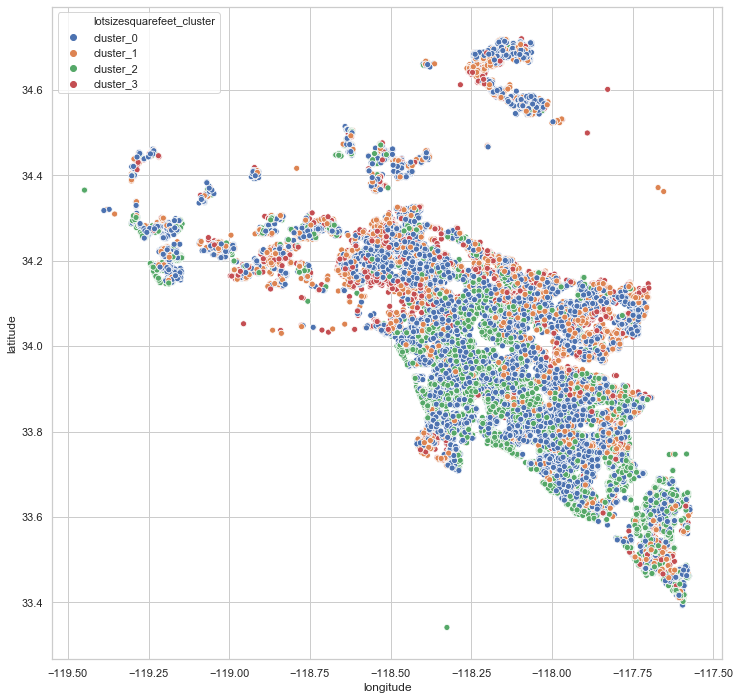

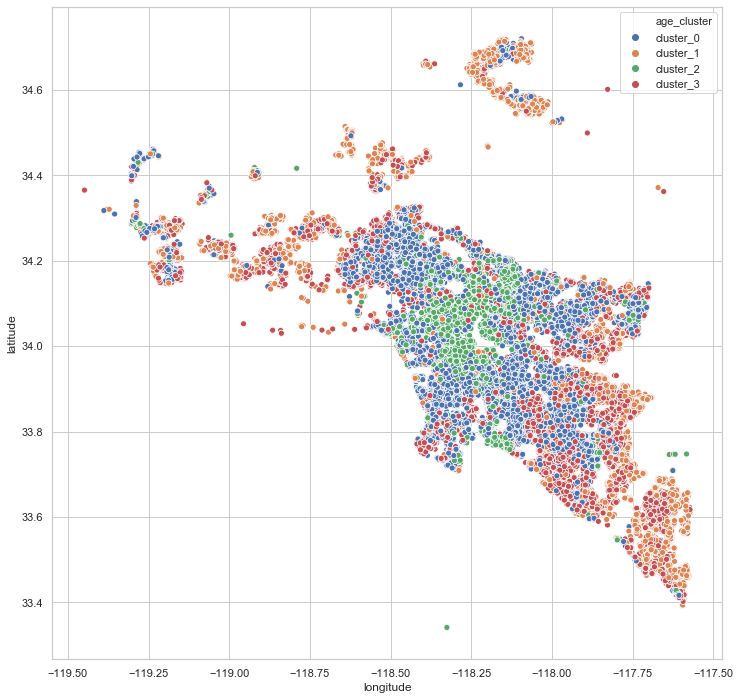

In [79]:
features = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']

for f in features:
    kmeans = KMeans(n_clusters = 4)
    kmeans.fit(train[[f]])

    train[f + '_cluster'] = kmeans.predict(train[[f]])
    train[f + '_cluster'].value_counts()
    train[f + '_cluster'] = 'cluster_' + train[f + '_cluster'].astype('str')

    plt.figure(figsize = (12,12))
    sns.scatterplot(x='longitude', y='latitude', data=train, hue= train[f + '_cluster'])
    plt.show()

In [80]:
train.head()

county             latitude            longitude  \
parcelid                                                          
14115188       Orange                33.82              -117.94   
17202081      Ventura                34.27              -118.88   
11867910  Los Angeles                34.10              -118.15   
12888153  Los Angeles                34.05              -117.77   
17055276      Ventura                34.45              -119.25   

                 regionidcity          regionidzip  rawcensustractandblock  \
parcelid                                                                     
14115188            16,764.00            97,021.00           60,590,871.06   
17202081            25,974.00            97,097.00           61,110,076.10   
11867910            50,677.00            96,531.00           60,374,808.04   
12888153            20,008.00            96,506.00           60,374,024.02   
17055276            13,091.00            97,099.00           61,110,009.03   

           censustractandblock          bathroomcnt  bedroomcnt  roomcnt  ...  \
parcelid                                                                  ...   
14115188 60,590,871,061,001.00                 2.00           3        6  ...   
17202081 61,110,076,101,023.00                 2.50           3        7  ...   
11867910 60,374,808,042,002.00                 1.00           2        0  ...   
12888153 60,374,024,023,004.00                 1.00           3        0  ...   
17055276 61,110,009,031,015.00                 1.50           2        6  ...   

          transactiondate                  age         transactions  \
parcelid                                                              
14115188                8                59.00                 1.00   
17202081                7                30.00                 1.00   
11867910                5                95.00                 1.00   
12888153                4                70.00                 1.00   
17055276                6                90.00                 1.00   

                     logerror         logerror_abs  lotsizesquarefeet_cluster  \
parcelid                                                                        
14115188                -0.01                 0.01                  cluster_0   
17202081                 0.07                 0.07                  cluster_0   
11867910                -0.02                 0.02                  cluster_0   
12888153                 0.03                 0.03                  cluster_0   
17055276                 0.09                 0.09                  cluster_1   

          bathroomcnt_cluster  bedroomcnt_cluster  \
parcelid                                            
14115188            cluster_1           cluster_0   
17202081            cluster_0           cluster_0   
11867910            cluster_2           cluster_3   
12888153            cluster_2           cluster_0   
17055276            cluster_1           cluster_3   

          calculatedfinishedsquarefeet_cluster  age_cluster  
parcelid                                                     
14115188                             cluster_3    cluster_0  
17202081                             cluster_0    cluster_1  
11867910                             cluster_3    cluster_2  
12888153                             cluster_3    cluster_0  
17055276                             cluster_3    cluster_2  

[5 rows x 27 columns]

In [81]:
# features = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']

features = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']
def elbow(data, feature, n):
    for f in features:
        ks = range(1,n+1)
        sse = []
        for k in ks:
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(data[[f]])
            sse.append(kmeans.inertia_)
        print(pd.DataFrame(dict(k=ks, sse=sse)))
        plt.plot(ks, sse, 'bx-')
        plt.xlabel('k')
        plt.ylabel('SSE')
        plt.title(f'Visual Aid (Elbow Method) for the Identification of Optimal K for {f}')
        plt.show()


     k                  sse
0    1            24,115.09
1    2             8,756.09
2    3             3,496.05
3    4             1,257.37
4    5               651.44
5    6               347.52
6    7               195.41
7    8                93.08
8    9                31.79
9   10                 4.52
10  11                 0.00
11  12                 0.00
12  13                 0.00
13  14                 0.00
14  15                 0.00


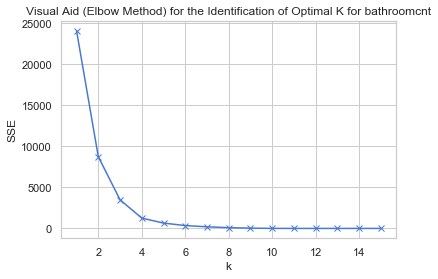

     k                  sse
0    1            27,046.50
1    2             8,376.70
2    3             3,333.47
3    4               727.94
4    5               375.64
5    6                34.03
6    7                 0.00
7    8                 0.00
8    9                 0.00
9   10                 0.00
10  11                 0.00
11  12                 0.00
12  13                 0.00
13  14                 0.00
14  15                 0.00


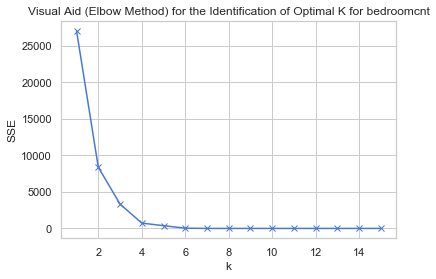

     k                  sse
0    1    18,333,734,194.80
1    2     6,220,255,132.01
2    3     3,245,816,548.03
3    4     1,958,812,927.75
4    5     1,322,529,900.42
5    6       957,702,592.18
6    7       718,149,074.12
7    8       563,358,075.51
8    9       452,692,385.13
9   10       369,078,294.52
10  11       304,391,621.75
11  12       256,224,386.50
12  13       219,787,042.34
13  14       189,104,861.58
14  15       168,454,691.39


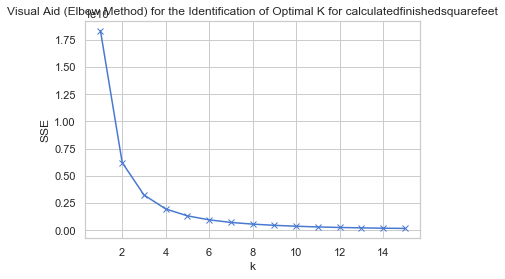

     k                  sse
0    1   276,402,012,499.57
1    2   113,030,942,279.08
2    3    61,658,093,598.94
3    4    36,758,951,598.83
4    5    21,558,387,486.61
5    6    15,622,874,190.94
6    7    11,253,553,334.10
7    8     8,855,478,926.04
8    9     6,935,511,809.01
9   10     5,506,550,303.93
10  11     4,594,595,475.24
11  12     3,876,213,569.19
12  13     3,320,787,793.80
13  14     2,827,416,988.68
14  15     2,492,206,362.15


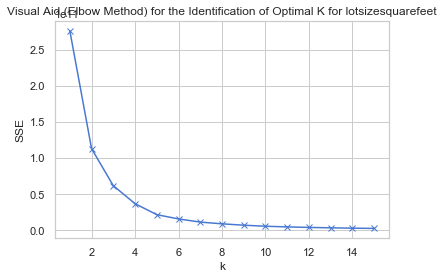

     k                  sse
0    1        17,264,649.38
1    2         6,312,756.53
2    3         2,806,738.00
3    4         1,529,891.43
4    5         1,055,223.59
5    6           755,933.66
6    7           538,132.73
7    8           396,932.21
8    9           309,290.19
9   10           257,230.82
10  11           204,278.56
11  12           177,932.63
12  13           160,053.64
13  14           145,524.09
14  15           125,175.85


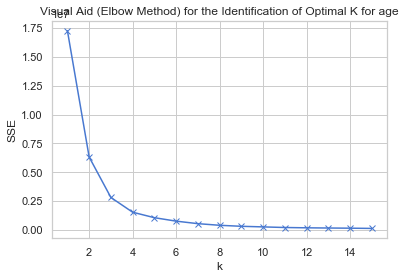

In [82]:
elbow(train, features, 15)

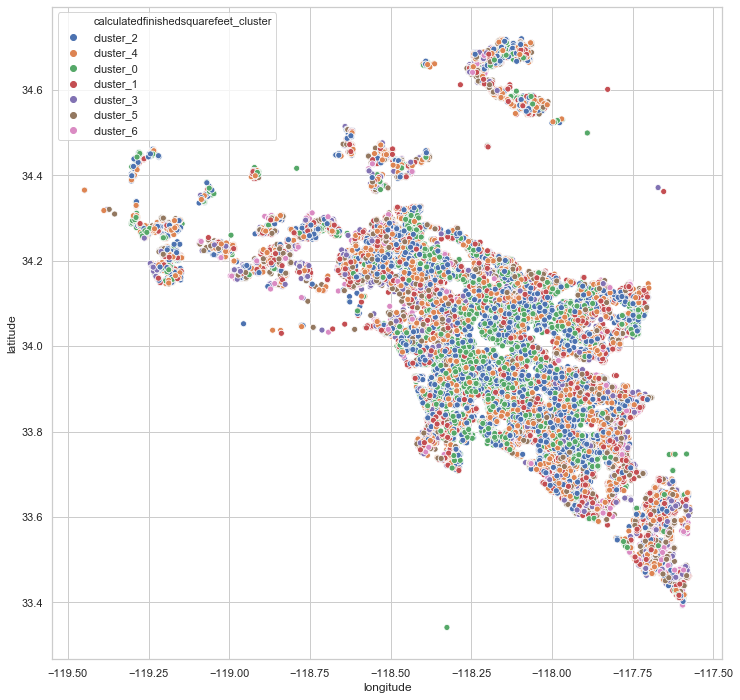

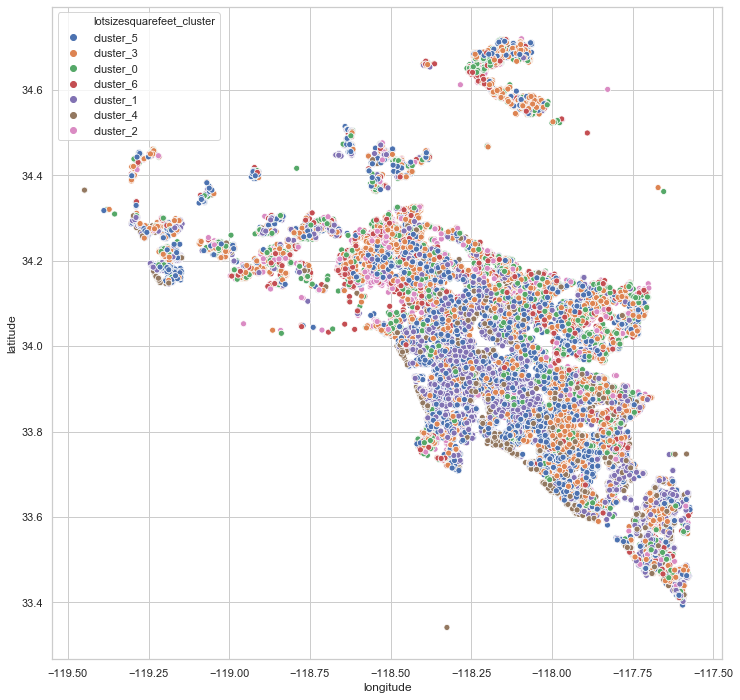

In [83]:
# based on elbow, regraph total sqft, lot sqft, age
features = ['calculatedfinishedsquarefeet','lotsizesquarefeet']

for f in features:
    kmeans = KMeans(n_clusters = 7)
    kmeans.fit(train[[f]])

    train[f + '_cluster'] = kmeans.predict(train[[f]])
    train[f + '_cluster'].value_counts()
    train[f + '_cluster'] = 'cluster_' + train[f + '_cluster'].astype('str')

    plt.figure(figsize = (12,12))
    sns.scatterplot(x='longitude', y='latitude', data=train, hue= train[f + '_cluster'])
    plt.show()

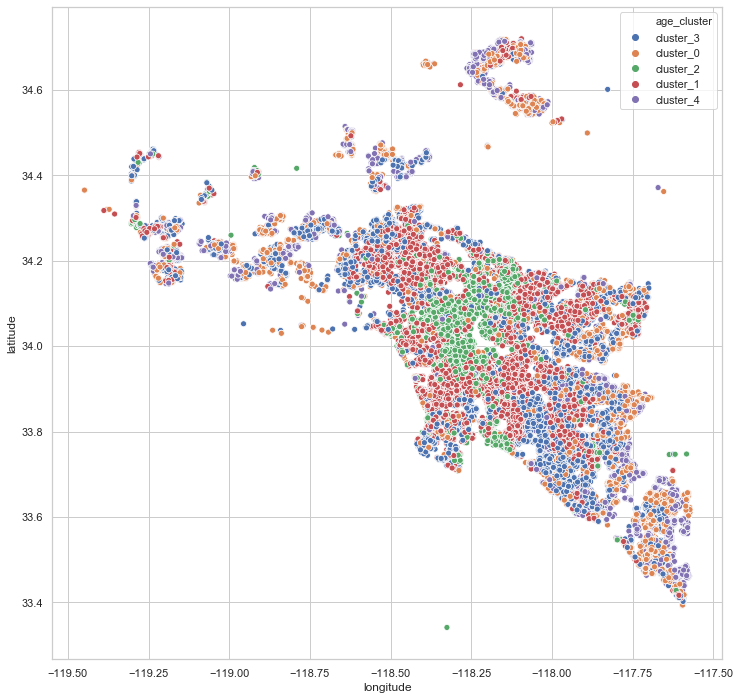

In [87]:
# based on elbow, regraph age & store clusters into train
features = ['age']

for f in features:
    kmeans = KMeans(n_clusters = 5)
    kmeans.fit(train[[f]])

    train[f + '_cluster'] = kmeans.predict(train[[f]])
    train[f + '_cluster'].value_counts()
    train[f + '_cluster'] = 'cluster_' + train[f + '_cluster'].astype('str')

    plt.figure(figsize = (12,12))
    sns.scatterplot(x='longitude', y='latitude', data=train, hue= train[f + '_cluster'])
    plt.show()

In [84]:
features = ['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']

train[features].head()

bathroomcnt  bedroomcnt  calculatedfinishedsquarefeet  \
parcelid                                                                  
14115188                 2.00           3                      1,348.00   
17202081                 2.50           3                      1,770.00   
11867910                 1.00           2                        805.00   
12888153                 1.00           3                      1,120.00   
17055276                 1.50           2                      1,330.00   

            lotsizesquarefeet                  age  
parcelid                                            
14115188             6,600.00                59.00  
17202081             6,902.00                30.00  
11867910             7,625.00                95.00  
12888153             6,296.00                70.00  
17055276            10,480.00                90.00

     k                  sse
0    1   294,753,062,505.34
1    2   129,233,134,757.61
2    3    77,774,612,422.45
3    4    52,576,275,763.63
4    5    37,181,642,907.43
5    6    31,209,461,848.66
6    7    26,774,487,454.75
7    8    22,994,169,015.41
8    9    20,586,171,331.17
9   10    18,656,332,378.27
10  11    16,696,035,208.14
11  12    15,312,569,114.01
12  13    14,080,024,771.44
13  14    13,261,925,082.59
14  15    12,429,291,716.62
15  16    11,798,964,940.64
16  17    11,205,204,806.08
17  18    10,642,744,780.36
18  19    10,072,150,404.27
19  20     9,670,586,291.55


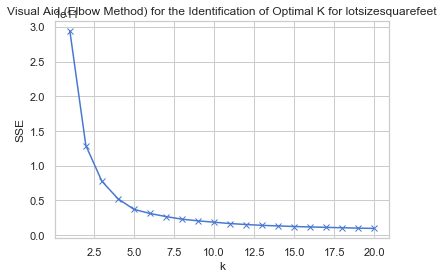

In [85]:
#unscaled train
ks = range(1,21)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train[features])
    sse.append(kmeans.inertia_)
print(pd.DataFrame(dict(k=ks, sse=sse)))
plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title(f'Visual Aid (Elbow Method) for the Identification of Optimal K for {f}')
plt.show()

     k                  sse
0    1           175,435.00
1    2           111,422.62
2    3            91,619.26
3    4            79,830.76
4    5            70,786.16
5    6            63,987.01
6    7            58,701.00
7    8            55,356.48
8    9            52,180.92
9   10            49,275.55
10  11            47,243.32
11  12            45,169.72
12  13            43,618.65
13  14            41,953.33
14  15            40,498.75
15  16            39,170.40
16  17            37,884.87
17  18            36,654.48
18  19            35,706.25
19  20            34,701.03


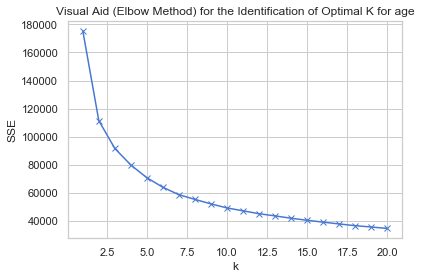

In [92]:
ks = range(1,21)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(train1[features])
    sse.append(kmeans.inertia_)
print(pd.DataFrame(dict(k=ks, sse=sse)))
plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title(f'Visual Aid (Elbow Method) for the Identification of Optimal K for {f}')
plt.show()

In [89]:
train.cluster.unique()

AttributeError: 'DataFrame' object has no attribute 'cluster'

In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35087 entries, 14115188 to 11065285
Data columns (total 27 columns):
county                                  35087 non-null object
latitude                                35087 non-null float64
longitude                               35087 non-null float64
regionidcity                            35087 non-null object
regionidzip                             35087 non-null object
rawcensustractandblock                  35087 non-null float64
censustractandblock                     35087 non-null float64
bathroomcnt                             35087 non-null float64
bedroomcnt                              35087 non-null int64
roomcnt                                 35087 non-null int64
calculatedfinishedsquarefeet            35087 non-null float64
lotsizesquarefeet                       35087 non-null float64
tax_rate                                35087 non-null float64
taxvaluedollarcnt                       35087 non-null float64
struct

# Model

In [ ]:
# Visualise clusters using selected features

ValueError: could not convert string to float: 'Los Angeles'

In [ ]:
# encode county information

In [91]:
def encode(train, test, col_name):
    from sklearn.preprocessing import LabelEncoder
    
    # Integer Encoding
    int_encoder = LabelEncoder()
    train[col_name] = int_encoder.fit_transform(train[col_name])
    test[col_name] = int_encoder.transform(test[col_name])
    
    return train, test

In [92]:
train1, test1 = encode(train, test, 'county')

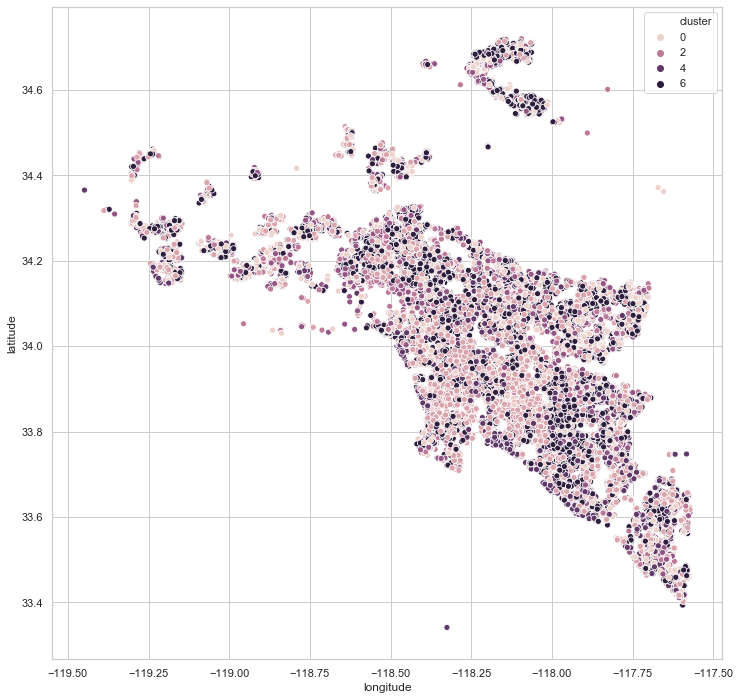

In [93]:
features = ['county','bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']

kmeans = KMeans(n_clusters=6, random_state=123).fit(train1[features])
train1['cluster'] = kmeans.predict(train1[features])
test1['cluster'] = kmeans.predict(test1[features])

plt.figure(figsize = (12,12))
sns.scatterplot(x='longitude', y='latitude', data=train1, hue= 'cluster')
plt.show()

In [94]:
train1['age'] = train1['age'].astype(int)
train1['lotsizesquarefeet'] = train1['lotsizesquarefeet'].astype(int)
train1['calculatedfinishedsquarefeet'] = train1['calculatedfinishedsquarefeet'].astype(int)
train1['bedroomcnt'] = train1['bedroomcnt'].astype(int)
train1['bathroomcnt'] = train1['bathroomcnt'].astype(int)


test1['age'] = test1['age'].astype(int)
test1['lotsizesquarefeet'] = test1['lotsizesquarefeet'].astype(int)
test1['calculatedfinishedsquarefeet'] = test1['calculatedfinishedsquarefeet'].astype(int)
test1['bedroomcnt'] = test1['bedroomcnt'].astype(int)
test1['bathroomcnt'] = test1['bathroomcnt'].astype(int)

## Spliting out X and Y variables for modeling

In [95]:
x_train1 = train1[['county','bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']]
y_train1 = train1[['logerror']]

x_test1 = test1[['county','bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']]
y_test1 = test1[['logerror']]

### Linear Regression

- Simplest form of regression

In [96]:
def linear_model(X_train, y_train, X_test, y_test):

    lm=LinearRegression()
    lm.fit(X_train,y_train)
    y_train_predicted=lm.predict(X_train)

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)
    
    
    y_pred_test = lm.predict(x_test1)

    rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test1))
    r2_test = r2_score(y_pred_test, y_test1)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    print("-------------------------------------------")
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test1)))

In [97]:
linear_model(x_train1, y_train1, x_test1, y_test1)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.16799007451501632
R2 score of training set is 0.0018238745676799617
-------------------------------------------
The model performance for the test set
-------------------------------------------
RMSE of test set is 0.15619374578509995
R2 score of test set is -477.1792357523758


### Decision Tree Regressor
- A decision tree model is very intuitive and easy to explain and understand
- Gernerally speaking, performs well for a broad range of problems

In [98]:
regressor = DecisionTreeRegressor(max_depth=10, random_state=123)
regressor.fit(x_train1, y_train1)
y_pred = regressor.predict(x_train1)
y_true = y_train1
y_train_predicted = y_pred

rmse_train = np.sqrt(mean_squared_error(y_train1, y_train_predicted))
r2_train = r2_score(y_train1, y_train_predicted)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_score(y_true, y_pred)))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.15104583047321038
R2 score of training set is 0.193029952263303


In [99]:
y_pred_test = regressor.predict(x_test1)

rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test1))
r2_test = r2_score(y_pred_test, y_test1)

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test1)))

The model performance for the test set
-------------------------------------------
RMSE of test set is 0.16788898485390633
R2 score of test set is -6.579246262951767


### Random Forest Regressor
- Naturally performs feature selection
- Reduces overfitting 
- More accurate than decision tress

In [100]:
x_train1, y_train1 = make_regression(n_features=6, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(x_train1, y_train1)  

y_train_predicted = regr.predict(x_train1)
rmse_train = np.sqrt(mean_squared_error(y_train_predicted,y_train1))

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_score(y_train_predicted, y_train1)))

NameError: name 'make_regression' is not defined

In [ ]:
y_pred_test = regr.predict(x_test1)

rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test1))
r2_test = r2_score(y_pred_test, y_test1)

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test1)))

### Polynomial Regression
- curate the weight of individual features better than pure linear regression model

In [101]:
def create_polynomial_regression_model_1(degree, X_train, y_train):

    "Creates a polynomial regression model for the given degree"
    poly_features = PolynomialFeatures(degree=degree)
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
    #result['y_train_pred']=y_train_predicted
    
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    return poly_model


In [102]:
poly_model = create_polynomial_regression_model_1(5, x_train1, y_train1)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.16725788762358834
R2 score of training set is 0.010506039436375847


In [103]:
y_pred_test = poly_model.predict(x_test1)

rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test1))
r2_test = r2_score(y_pred_test, y_test1)

print("-------------------------------------------")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test1)))

ValueError: shapes (8772,6) and (462,1) not aligned: 6 (dim 1) != 462 (dim 0)

### Lasso Regression 
- Provide very good prediction accuracy because the shrinking and removing the coefficients can reduce variance withouut a substantial increase of bias
- reducing over-fitting
- can help in feature selection

In [104]:
lasso = Lasso()
lasso.fit(x_train1, y_train1)
y_pred_las = lasso.predict(x_train1)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(np.sqrt(mean_squared_error(y_train1,y_pred_las))))
print("R2 score of training set is {}".format(r2_score(y_train1, y_pred_las)))

y_pred_test = lasso.predict(x_test1)

rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test1))
r2_test = r2_score(y_pred_test, y_test1)
print('\n')
print("-------------------------------------------")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test1)))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.16802292166810032
R2 score of training set is 0.0014334890101799225


-------------------------------------------
The model performance for the test set
-------------------------------------------
RMSE of test set is 0.15619417495680912
R2 score of test set is -934.4931836533825


### Ridge Regression 
- shrinks the coefficents and helps to reduce the model complexity and multi-collinearity.

In [105]:
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(x_train1, y_train1)
y_pred_rr = rr.predict(x_train1)
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(np.sqrt(mean_squared_error(y_train1,y_pred_rr))))
print("R2 score of training set is {}".format(r2_score(y_train1, y_pred_rr)))

y_pred_test = rr.predict(x_test1)

rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test1))
r2_test = r2_score(y_pred_test, y_test1)
print('\n')
print("-------------------------------------------")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test1)))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.16799007451501635
R2 score of training set is 0.0018238745676798507


-------------------------------------------
The model performance for the test set
-------------------------------------------
RMSE of test set is 0.1561937457726174
R2 score of test set is -477.1793393862469


### Elastic Net 

- Combines Lasso and Ridge algorithms into one. 
- Can remove weak features 

In [106]:
elastic = ElasticNet()
elastic.fit(x_train1, y_train1)
y_pred_e = elastic.predict(x_train1)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(np.sqrt(mean_squared_error(y_train1,y_pred_e))))
print("R2 score of training set is {}".format(r2_score(y_train1, y_pred_e)))

y_pred_test = elastic.predict(x_test1)

rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test1))
r2_test = r2_score(y_pred_test, y_test1)
print('\n')
print("-------------------------------------------")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test1)))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.16801754839711927
R2 score of training set is 0.0014973550899868293


-------------------------------------------
The model performance for the test set
-------------------------------------------
RMSE of test set is 0.15619844688719758
R2 score of test set is -724.6447686880798


Use the 6 clusters to run through the algorithms

- decision tree regression
- logistic regression
- linear regression
- polynimial regression
- ridge regression
- lasso regression

In [ ]:
# We will be using long/lat clusters to plug into our model
kmeans = KMeans(n_clusters=5, random_state=123).fit(train1[['longitude', 'latitude']])
train1['cluster'] = kmeans.predict(train1[['longitude', 'latitude']])

cluster_0 = train1[train1.cluster == 0]
cluster_1 = train1[train1.cluster == 1]
cluster_2 = train1[train1.cluster == 2]
cluster_3 = train1[train1.cluster == 3]
cluster_4 = train1[train1.cluster == 4]

print(cluster_0.shape)
print(cluster_1.shape)
print(cluster_2.shape)
print(cluster_3.shape)
print(cluster_4.shape)

In [117]:
x_train_clust5 = train1[train1.cluster == 5]
y_train_clust5 = x_train_clust5[['logerror']]
x_train_clust5 = x_train_clust5[['county','bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']]

x_test_clust5 = test1[test1.cluster == 5]
y_test_clust5 = x_test_clust5[['logerror']]
x_test_clust5 = x_test_clust5[['county','bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet','lotsizesquarefeet','age']]

Linear Regression

In [119]:
def linear_model(X_train, y_train, X_test, y_test):

    lm=LinearRegression()
    lm.fit(X_train,y_train)
    y_train_predicted=lm.predict(X_train)

    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)
    
    
    y_pred_test = lm.predict(x_test1)

    rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test1))
    r2_test = r2_score(y_pred_test, y_test1)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    print("-------------------------------------------")
    print("The model performance for the test set")
    print("-------------------------------------------")
    print("RMSE of test set is {}".format(rmse_test))
    print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test1)))

In [120]:
linear_model(x_train_clust5, y_train_clust5, x_test_clust5, y_test_clust5)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.17005117066190512
R2 score of training set is 0.0007725162897862514
-------------------------------------------
The model performance for the test set
-------------------------------------------
RMSE of test set is 0.15616545583648686
R2 score of test set is -872.9284411430867


Decision Tree Regressor

In [121]:
regressor = DecisionTreeRegressor(max_depth=10, random_state=123)
regressor.fit(x_train_clust5, y_train_clust5)
y_pred = regressor.predict(x_train_clust5)
y_true = y_train_clust5
y_train_predicted = y_pred

rmse_train = np.sqrt(mean_squared_error(y_train_clust5, y_train_predicted))
r2_train = r2_score(y_train_clust5, y_train_predicted)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_score(y_true, y_pred)))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.1490951921381574
R2 score of training set is 0.23187412183947842


In [124]:
y_pred_test = regressor.predict(x_test_clust5)

rmse_test = np.sqrt(mean_squared_error(y_test_clust5, y_pred_test))
r2_test = r2_score(y_pred_test, y_test_clust5)

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test_clust5)))

The model performance for the test set
-------------------------------------------
RMSE of test set is 0.17832254938660985
R2 score of test set is -3.9594568254705766


Random Forest

In [127]:
from sklearn.ensemble import RandomForestRegressor
#x_train_clust5, y_train_clust5 = make_regression(n_features=6, n_informative=2,random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
regr.fit(x_train_clust5, y_train_clust5)  

y_train_predicted = regr.predict(x_train_clust5)
rmse_train = np.sqrt(mean_squared_error(y_train_predicted,y_train_clust5))

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(rmse_train))
print("R2 score of training set is {}".format(r2_score(y_train_predicted, y_train_clust5)))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.16885383414045038
R2 score of training set is -393.5934758430421


In [128]:
y_pred_test = regr.predict(x_test_clust5)

rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test_clust5))
r2_test = r2_score(y_pred_test, y_test_clust5)

print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test_clust5)))

The model performance for the test set
-------------------------------------------
RMSE of test set is 0.152889317514494
R2 score of test set is -275.7803050798048


In [129]:
def create_polynomial_regression_model_1(degree, X_train, y_train):

    "Creates a polynomial regression model for the given degree"
    poly_features = PolynomialFeatures(degree=degree)
    # transforms the existing features to higher degree features.
    X_train_poly = poly_features.fit_transform(X_train)
    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train_poly)
    #result['y_train_pred']=y_train_predicted
    
    # evaluating the model on training dataset
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
    r2_train = r2_score(y_train, y_train_predicted)

    print("The model performance for the training set")
    print("-------------------------------------------")
    print("RMSE of training set is {}".format(rmse_train))
    print("R2 score of training set is {}".format(r2_train))
    return poly_model


In [130]:
poly_model = create_polynomial_regression_model_1(5, x_train_clust5, y_train_clust5)

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.16788944884748588
R2 score of training set is 0.02601576927293292


In [132]:
y_pred_test = poly_model.predict(x_test_clust5)

rmse_test = np.sqrt(mean_squared_error(y_test_clust5,y_pred_test))
r2_test = r2_score(y_test_clust5, y_pred_test)

print("-------------------------------------------")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test_clust5)))

ValueError: shapes (2748,6) and (462,1) not aligned: 6 (dim 1) != 462 (dim 0)

Lasso Regression

In [133]:
lasso = Lasso()
lasso.fit(x_train_clust5, y_train_clust5)
y_pred_las = lasso.predict(x_train_clust5)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(np.sqrt(mean_squared_error(y_train_clust5,y_pred_las))))
print("R2 score of training set is {}".format(r2_score(y_train_clust5, y_pred_las)))

y_pred_test = lasso.predict(x_test_clust5)

rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test_clust5))
r2_test = r2_score(y_pred_test, y_test_clust5)
print('\n')
print("-------------------------------------------")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test_clust5)))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.17010479328253242
R2 score of training set is 0.00014223960294290627


-------------------------------------------
The model performance for the test set
-------------------------------------------
RMSE of test set is 0.15214527949027415
R2 score of test set is -23253.075632973167


Ridge Regression

In [134]:
rr = Ridge(alpha=0.01) 
# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr.fit(x_train_clust5, y_train_clust5)
y_pred_rr = rr.predict(x_train_clust5)
print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(np.sqrt(mean_squared_error(y_train_clust5,y_pred_rr))))
print("R2 score of training set is {}".format(r2_score(y_train_clust5, y_pred_rr)))

y_pred_test = rr.predict(x_test_clust5)

rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test_clust5))
r2_test = r2_score(y_pred_test, y_test_clust5)
print('\n')
print("-------------------------------------------")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test_clust5)))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.1700511706619053
R2 score of training set is 0.000772516289784253


-------------------------------------------
The model performance for the test set
-------------------------------------------
RMSE of test set is 0.15205470417574524
R2 score of test set is -975.4785386912644


Elastic Net

In [135]:
elastic = ElasticNet()
elastic.fit(x_train_clust5, y_train_clust5)
y_pred_e = elastic.predict(x_train_clust5)

print("The model performance for the training set")
print("-------------------------------------------")
print("RMSE of training set is {}".format(np.sqrt(mean_squared_error(y_train_clust5,y_pred_e))))
print("R2 score of training set is {}".format(r2_score(y_train_clust5, y_pred_e)))

y_pred_test = elastic.predict(x_test_clust5)

rmse_test = np.sqrt(mean_squared_error(y_pred_test, y_test_clust5))
r2_test = r2_score(y_pred_test, y_test_clust5)
print('\n')
print("-------------------------------------------")
print("The model performance for the test set")
print("-------------------------------------------")
print("RMSE of test set is {}".format(rmse_test))
print("R2 score of test set is {}".format(r2_score(y_pred_test, y_test_clust5)))

The model performance for the training set
-------------------------------------------
RMSE of training set is 0.17009942256299349
R2 score of training set is 0.00020537563495548472


-------------------------------------------
The model performance for the test set
-------------------------------------------
RMSE of test set is 0.15212135088974943
R2 score of test set is -7326.026287214748
